# ***Regression with Neural Networks***
Created By
* Alwin Joseph Christopher - 201594340 - sgachri4@liverpool.ac.uk
* Mohamed Muradh Maricair - 201602133 - sgmkader@liverpool.ac.uk

In [1]:
#Installing sklearn, keras, tensorflow. Please uncomment below lines, if your system does not has these libraries

#%pip install sklearn
# %pip install keras
# %pip install tensorflow
#%pip install seaborn

# 1. Importing necessary libraries and Data 

In [49]:
# import libraries 
import numpy as np
import pandas as pd
# importing scikit libraries for data preprossing and splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

import datetime
# import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
%matplotlib inline



In [50]:
# fix seed for all utils numpy, random, tensorflow to get deterministic result
tf.keras.utils.set_random_seed(20)

## 1.1 Load Data from CSV file

In [51]:
# load data from csv file, please keep the file in same folder as python notebook code
data = pd.read_csv('kc_house_data.csv')

## 1.2 Preview first 5 rows of data

In [52]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## 1.3 Find if any NA values present in the data

In [55]:
# see if any null values are present in any of the columns
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 view the information of the dataset about its data type

In [56]:
# view the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1.5 view the distribution of each feature in data

In [57]:
# to view the distribution of various feature of the data
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# 2. Data Visualization and Analysis

## 2.1 Correlation Matrix

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

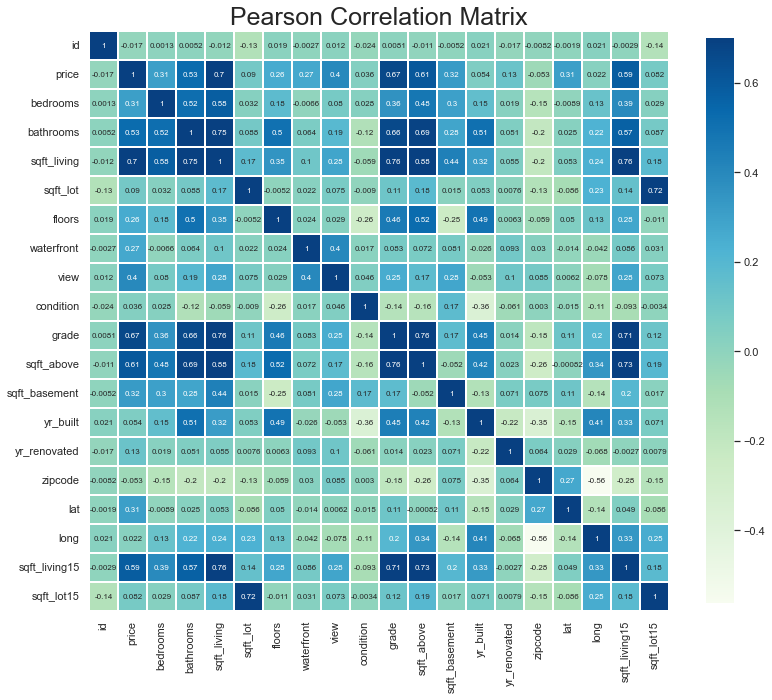

In [58]:
#correlation plot for all the feature
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .8})

## 2.2 We plot Price distribution and price variation with sqft of living area, since from above corr plot we can see price and sqft living has 0.7 linearity.

C:\Users\Alwin Joseph\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


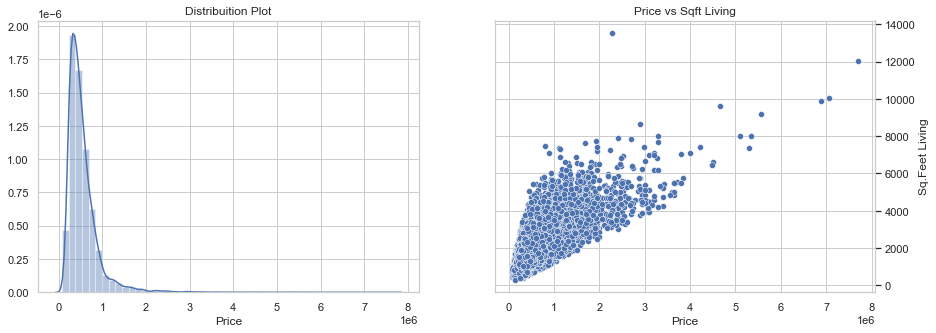

In [59]:
# price distribution plot and scatter plot comparing price and square feet living
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=data, ax=axes[1])
#sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price', ylabel='', title='Distribuition Plot')
axes[1].set(xlabel='Price', ylabel='Sq.Feet Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

## 2.3 Boxplot to find outliers present in bedrooms and floors with respect to **price**

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

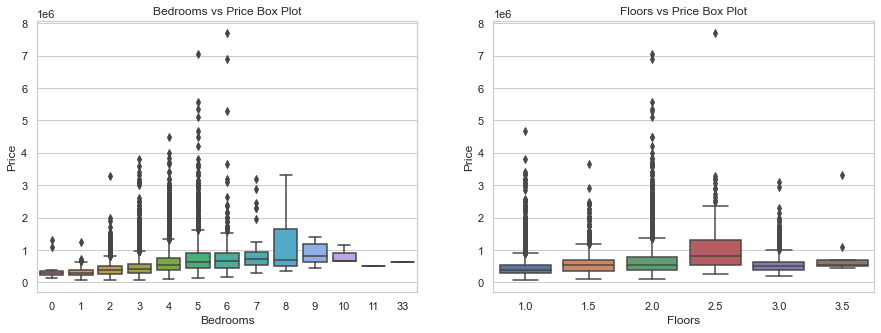

In [60]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedrooms'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['floors'],y=data['price'], ax=axes[1])
#sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

## 2.4 Count plot - number of houses with respect to each zipcode

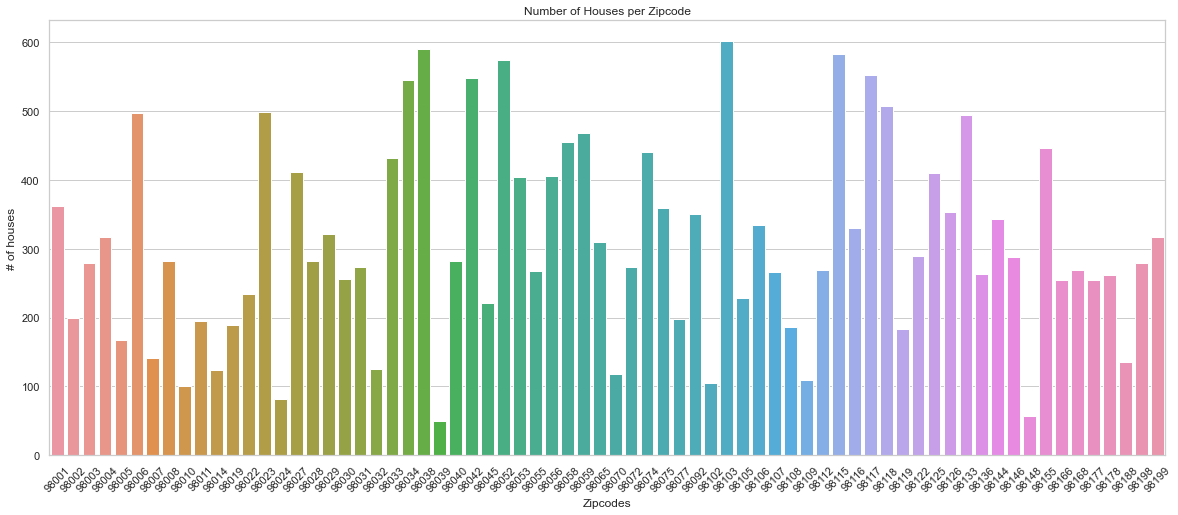

In [61]:
# plot count plot of zipcode
plt.figure(figsize=(20,8))
sns.countplot(data=data, x="zipcode")
plt.title('Number of Houses per Zipcode')
plt.xlabel('Zipcodes')
plt.ylabel('# of houses')
plt.xticks(rotation=45)
plt.show()

# 3. Feature Engineering

## 3.1 Fix the outliers

From above data visualization we can see that price is distributed from 0 to 350000 and above that values are outliers. hence we drop the price above 3000000

C:\Users\Alwin Joseph\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


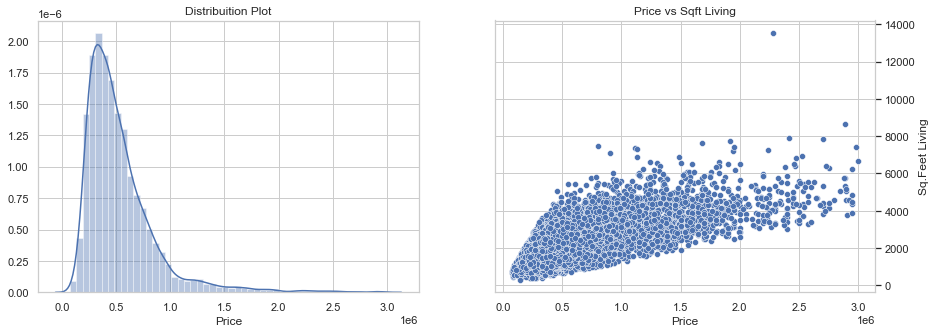

In [62]:
data = data[data.price < 3000000]
# price distribution plot and scatter plot comparing price and square feet living
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=data, ax=axes[1])
#sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price', ylabel='', title='Distribuition Plot')
axes[1].set(xlabel='Price', ylabel='Sq.Feet Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [63]:
data.shape

(21563, 21)

In [64]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [65]:
# droping id of the house as it does not have importance in predicting price
data = data.drop('id', axis=1)

## 3.2 Convert datetime object to two different columns of year and month

In [66]:
# instead of having timestamp of purchase, we get year and date of purchase, which would have effect on predicting price
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)

# drop the date timestamp
data = data.drop('date', axis=1)

## 3.3 Trend plot month vs price

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

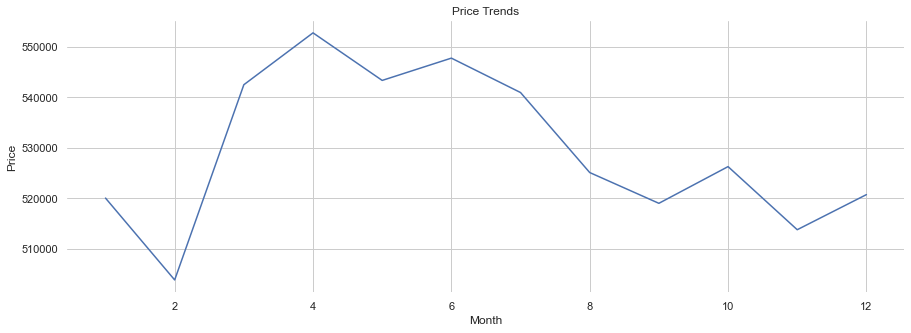

In [67]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
data.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

In [68]:
# find unique zipcode availble in the dataset
len(data['zipcode'].unique())

70

In [69]:
# we convert this zipcode to multiple binary feature to group house based on its zipcode
data = onehot_encode(data, 'zipcode', 'zip')

In [70]:
# finding the length of unique values in year renovated. But it has 70 unique values
len(data['yr_renovated'].unique())

70

In [77]:
data.query('yr_renovated != 0')

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1       538000.0         3        3.0         2570      7242     2.0   
35      696000.0         3        3.0         2300      3060     2.0   
95      905000.0         4        3.0         3300     10250     1.0   
103    1088000.0         3        3.0         2920      8113     2.0   
115     740500.0         3        4.0         4380      6350     2.0   
...          ...       ...        ...          ...       ...     ...   
19622  1150000.0         3        2.0         1760      6788     2.0   
20057   434900.0         3        2.0         1520      5040     2.0   
20444   500012.0         4        3.0         2400      9612     1.0   
20447   356999.0         3        2.0         1010      1546     2.0   
20962   110000.0         2        1.0          828      4524     1.0   

       waterfront  view  condition  grade  ...  zip_98146  zip_98148  \
1               0     0          3      7  ...          0          0   
35              0     0          3      8  ...          0          0   
95              0     0          3      7  ...          0          0   
103             0     0          3      8  ...          0          0   
115             0     0          3      8  ...          0          0   
...           ...   ...        ...    ...  ...        ...        ...   
19622           1     4          3      7  ...          0          0   
20057           0     0          3      7  ...          0          0   
20444           0     0          3      8  ...          0          0   
20447           0     0          3      8  ...          0          0   
20962           0     0          3      6  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
1              0          0          0          0          0          0   
35             0          0          0          0          0          0   
95             0          0          0          0          0          0   
103            0          0          0          0          0          0   
115            0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
19622          0          0          0          0          0          0   
20057          0          0          0          1          0          0   
20444          0          0          0          0          0          0   
20447          0          0          0          0          0          0   
20962          0          0          0          0          0          0   

       zip_98198  zip_98199  
1              0          0  
35             0          0  
95             0          0  
103            0          0  
115            0          0  
...          ...        ...  
19622          0          0  
20057          0          0  
20444          0          0  
20447          0          0  
20962          0          0  

[906 rows x 88 columns]

In [72]:
# finding % of data with year renovated value not equal to 0, and it seems only 4% has this value set
len(data.query('yr_renovated != 0'))/len(data) *100

4.201641701062004

In [73]:
# instead of doing one hot encoding(which will result in 150 features and year renovated only has 4% of data), we convert year renovated to binary data - which implies whether house is renovated or not
data.loc[(data.yr_renovated>0),'yr_renovated'] = 1

In [75]:
# since some of the values in bathrooms and floors has decimal values, which is not possible as number of bathroom and floors should be an integer.
data['bathrooms']=data['bathrooms'].apply(np.ceil)
data['floors'] = data['floors'].apply(np.ceil)

In [76]:
# drop lat and longitude column from data,as we can get importance of the location through zipcode feature
data = data.drop(['lat','long'],axis=1)

# 4. Splitting and Scaling

In [78]:
# convert data to features and target values
y = data['price'].copy()
X = data.drop('price', axis=1).copy()

In [79]:
# split the data to training set and test set with 70% split
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [80]:
# we are using Min Max scaler to scale all features to values between 0 and 1
scaler = MinMaxScaler()
tf_X_train = scaler.fit_transform(tf_X_train)
tf_X_test = scaler.transform(tf_X_test)


In [81]:
# preview the shape of the train data
tf_X_train.shape

(15094, 87)

# 5. Keras model Implementation

## 5.1 Generic Function to create keras model based of hyperparameter given to model
 1. this function creates new model
 2. Intialize optimizer based on learning rate
 3. Add hidden layers and neurons for each layer
 4. Compile the model with metrics MAE and MSE
 5. plots the EPOCH Vs LOsses for each model trained. It plots both loss and validation loss
 6. returns us with model and history of losses and metrics
 7. Earlystopping is addded to the model with the patience of 10 epochs, if there isn't any considerable change in the metrics or loss, model training is stopped

 **NOTE : for ease of just showing Plotted graphs, we marked verbose as 0 in below function, If you need to see message printed for each execution please change verbose to 1**

In [120]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
#define the keras model
def keras_model(layers,neurons,hid_activation,dense_activation,optimizer,loss,size,epoch,lr,title,X_train = tf_X_train, y_train = tf_y_train):
  opt = None
  verbose = 0 # change to 1 if more information needed to print in console
  if optimizer =='adam':
    opt = keras.optimizers.Adam(learning_rate = lr)
  elif optimizer =='sgd':
    opt= keras.optimizers.SGD(learning_rate=lr,momentum = 0.7)
  elif optimizer == 'adagrad':
    opt = keras.optimizers.Adagrad(learning_rate = lr)
  elif optimizer == 'RMSprop':
    opt = keras.optimizers.Adagrad(learning_rate = lr)

  # define the model
  model = Sequential()
  model.add(Dropout(0.2,input_shape = (X_train.shape[1],)))

  # put the hidden layers in for loop so that it can be tuned for different layers
  for i in range(layers):
    model.add(Dense(neurons,activation=hid_activation))
  model.add(BatchNormalization())
  # output layer
  model.add(Dense(1,activation=dense_activation))
  model.summary()

  #compile the model
  model.compile(optimizer =opt,loss =loss,metrics=['mean_absolute_error','mean_squared_error'])
  # Set callback functions to early stop training and save the best model so far
  callbacks = [EarlyStopping(monitor='loss', patience=10,restore_best_weights=True)]

  tf.keras.utils.set_random_seed(20)
  #fit the model
  history = model.fit(X_train,y_train,batch_size = size,epochs=epoch,verbose=verbose,validation_split=0.1,shuffle=True,callbacks=callbacks)

  
  losses = pd.DataFrame(model.history.history)
  plotting = losses[['loss','val_loss']]
  plt.figure(figsize=(15,5))
  sns.lineplot(data=plotting,lw=3)
  plt.xlabel('Epochs')
  plt.ylabel('metrics')
  plt.title('Metrics per Epoch for {}'.format(title))
  sns.despine()
  return model,losses

## 5.2 Plotting best training and test loss obtained for a hyper parameter

In [83]:
# code for plotting single Hyperparameter aganist loss for test and train
def plotloss(x,test,train,xLabel):
  plt.figure(figsize=(12,8))
  plt.plot(x,test,label='Test Loss',c='r')
  plt.plot(x,train,label='Train Loss',c='g')
  plt.grid()
  plt.xlabel(xLabel)
  plt.ylabel('Loss')
  plt.title('HyperParameter Tuning for {}'.format(xLabel))
  plt.legend()
  plt.tight_layout()
  plt.show()

## 5.3 Plots calculated R2 score for each value of an hyper parameter

x - different hyperparamerter values tuned

y - obtained r2 score for that hyper parameter

In [84]:
def plotR2Score(x,y,xLabel):
  plt.figure(figsize=(12,8))
  plt.plot(x,y,label='R2 Score',c='r')
  plt.grid()
  plt.xlabel(xLabel)
  plt.ylabel('R2 Scores')
  plt.title('Model fitness of r2 score for {}'.format(xLabel))
  plt.legend()
  plt.tight_layout()
  plt.show()

## 5.4 Plotting model fitness graph

1. we scatter y_test with predicted y
2. we plot a perfect line for y_test

this gives us how any model varied from actual value during prediction of value

In [85]:
def plotModelFitness(model,title):
  predictions = model.predict(tf_X_test)
  plt.figure(figsize=(12,8))
  # Our model predictions
  plt.scatter(tf_y_test,predictions)
  score = r2_score(tf_y_test,predictions)
  # Perfect predictions
  plt.plot(tf_y_test,tf_y_test,'r')
  plt.grid()
  plt.xlabel("True Y of Test Data")
  plt.ylabel('Model Predictions')
  plt.title("Perfect Fit vs True fit ({}) r2 score is {}".format(title,score))
  plt.legend()
  plt.tight_layout()
  plt.show()

  #evaluate with test data
  test_loss= model.evaluate(tf_X_test,tf_y_test)
  # returns r2 score of the model
  
  return score

# 6. Hyper Parameter Tuning

Different values of hyper parameters: 
1. Batch size : 25,50,75
2. Optimizers : Adam , Adagrad, SGD, RMSprop
3. Learning rate: 0.001,0.01,0.1
4. Activation function: relu, linear, LeakyRelu
5. Loss function: Mean Absolute Error, Mean Squared Error
6. Hidden Layers : 1 to 5
7. Neurons: 8,16,32,64,128

Below each section tunes specific hyper parameter and best values are fixed for consecutive trainings. Following steps followed for tuning the hyper parameter.
1. we initialize hyparameter values in list
2. Intialize test_loss, train_loss and r2 score as lists
3. we call model keras function for each value through loop
4. each time model is called, graph is plotted for epoch vs loss for a particular model
5. we gather best training loss, test loss and r2 score achieved and plot it for values of a hyper parameter.


## 6.1 Epoch vs Losses

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_32 (Dropout)        (None, 87)                0         
                                                                 
 dense_95 (Dense)            (None, 16)                1408      
                                                                 
 dense_96 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_32 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_97 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,729
Non-trainable params: 32
__________________________________________________

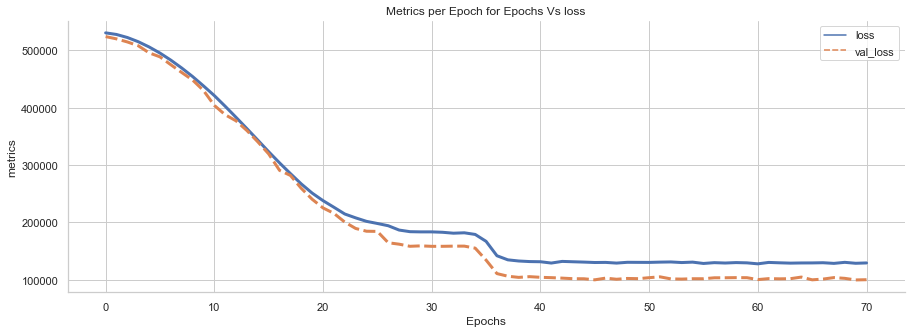

In [86]:
# set epoch to 100 and fix other hyper parameters. This is to find at what epoch our model losses converges
model,loss = keras_model(layers=2,neurons=16,hid_activation='linear',dense_activation='relu',optimizer='adam',loss='mean_absolute_error',size=25,epoch=100,lr = 0.01,title='Epochs Vs loss')

No handles with labels found to put in legend.


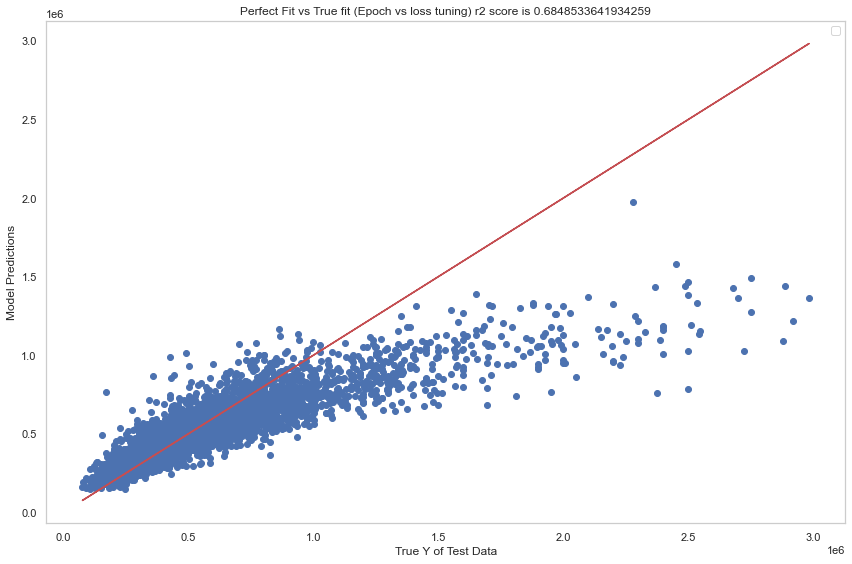

203/203 [==============================] - 0s 1ms/step - loss: 100716.8203 - mean_absolute_error: 100716.8203 - mean_squared_error: 34646335488.0000
Model fitness r2 score is 0.6848533641934259


In [87]:
# plotting model fitness graph which shows true Y vs predicted Y
print('Model fitness r2 score is {}'.format(plotModelFitness(model,'Epoch vs loss tuning')))

## 6.2 Batch Size vs losses

for tuning batch_size 25
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_33 (Dropout)        (None, 87)                0         
                                                                 
 dense_98 (Dense)            (None, 16)                1408      
                                                                 
 dense_99 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_33 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,729
Non-trainable params: 32
_________________________

No handles with labels found to put in legend.


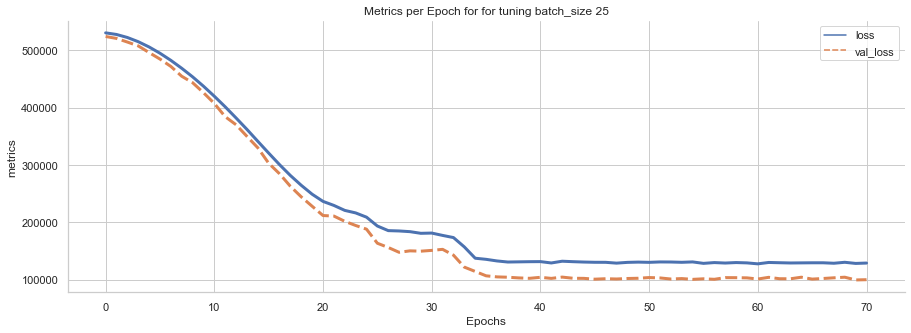

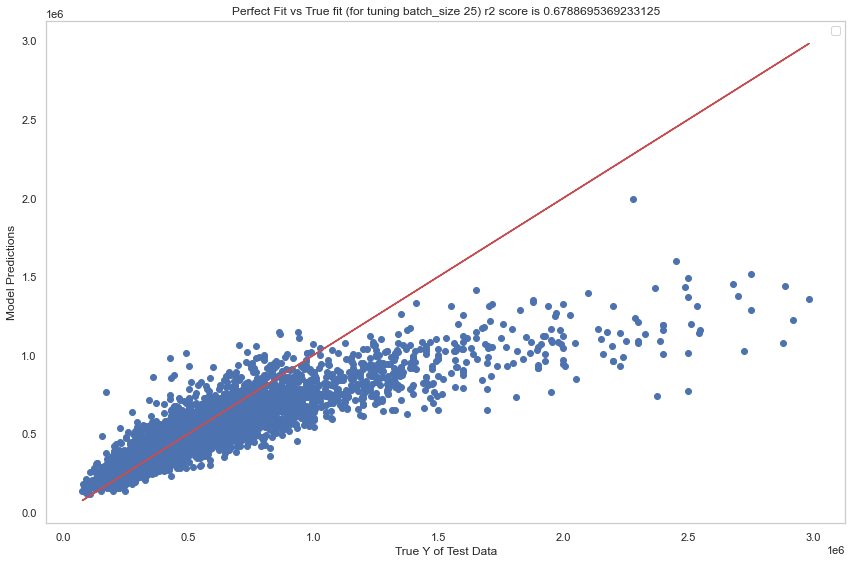

203/203 [==============================] - 0s 1ms/step - loss: 101372.6562 - mean_absolute_error: 101372.6562 - mean_squared_error: 35304181760.0000
for tuning batch_size 50
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_34 (Dropout)        (None, 87)                0         
                                                                 
 dense_101 (Dense)           (None, 16)                1408      
                                                                 
 dense_102 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_34 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_103 (Dense)           (None, 1)                 17        
           

No handles with labels found to put in legend.


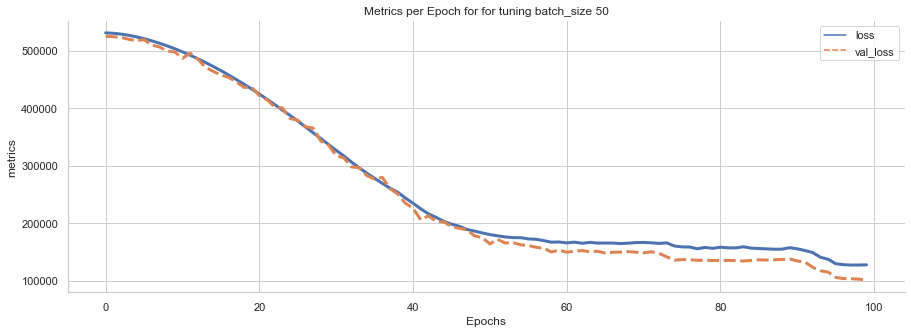

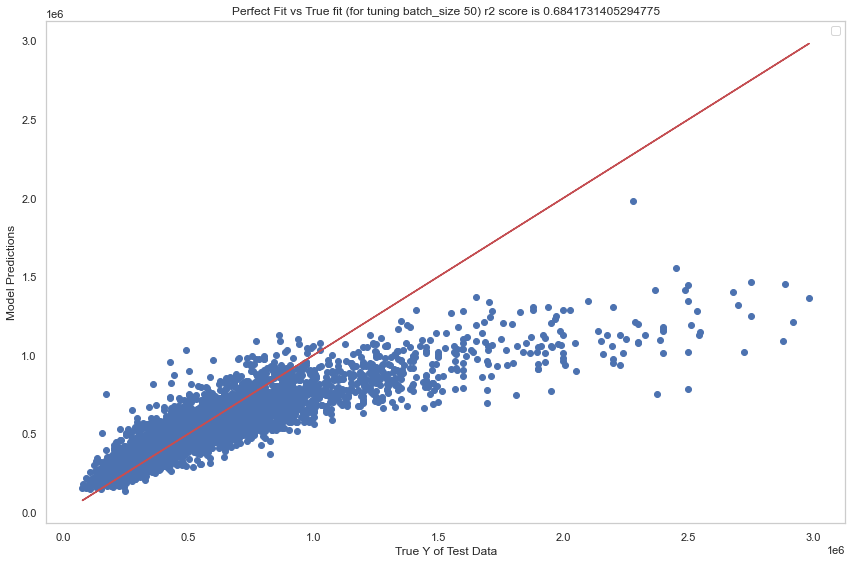

203/203 [==============================] - 0s 1ms/step - loss: 100972.2031 - mean_absolute_error: 100972.2031 - mean_squared_error: 34721120256.0000
for tuning batch_size 75
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_35 (Dropout)        (None, 87)                0         
                                                                 
 dense_104 (Dense)           (None, 16)                1408      
                                                                 
 dense_105 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_35 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_106 (Dense)           (None, 1)                 17        
           

No handles with labels found to put in legend.


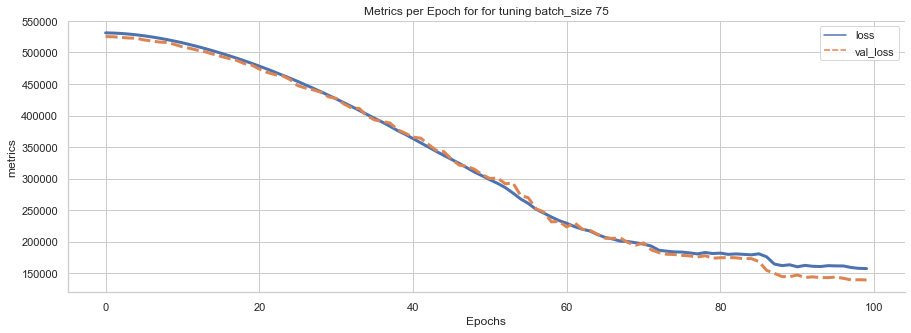

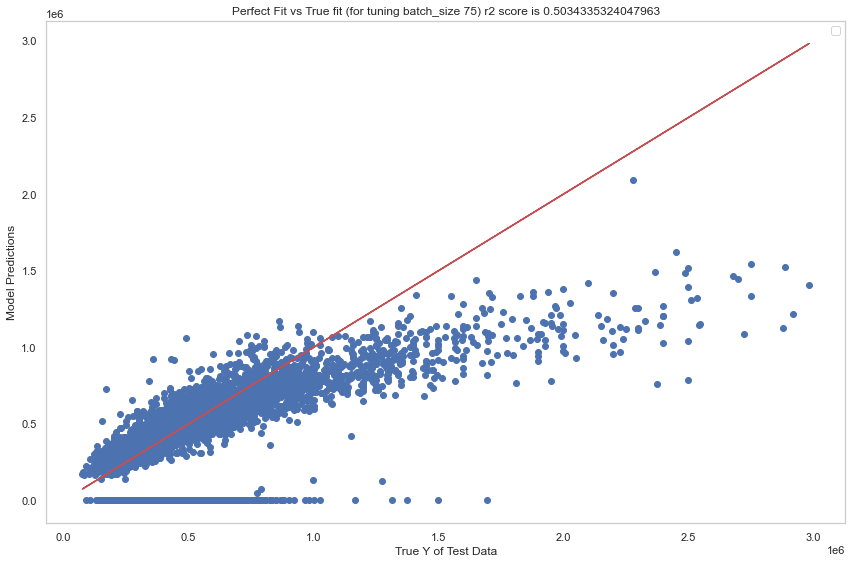

203/203 [==============================] - 0s 1ms/step - loss: 140109.8750 - mean_absolute_error: 140109.8750 - mean_squared_error: 54591131648.0000


In [88]:
# choosing batch size of 25,50,75 and train model for each batchsize and plot loss vs epoch for each model
batch_size= [25,50,75]
test_loss=[]
train_loss=[]
r2= []
for size in batch_size:
  title = 'for tuning batch_size {}'.format(size)
  print(title)
  model,loss = keras_model(layers=2,neurons=16,hid_activation='linear',dense_activation='relu',optimizer='adam',loss='mean_absolute_error',size=size,epoch=100,lr = 0.01,title = title)
  bLoss = min(loss['loss'])
  train_loss.append(bLoss)
  test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
  r2.append(plotModelFitness(model,title))

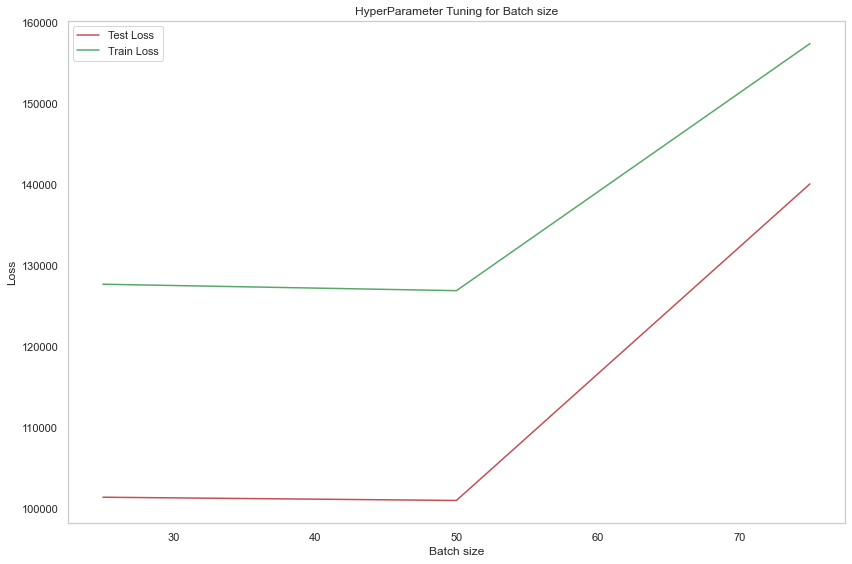

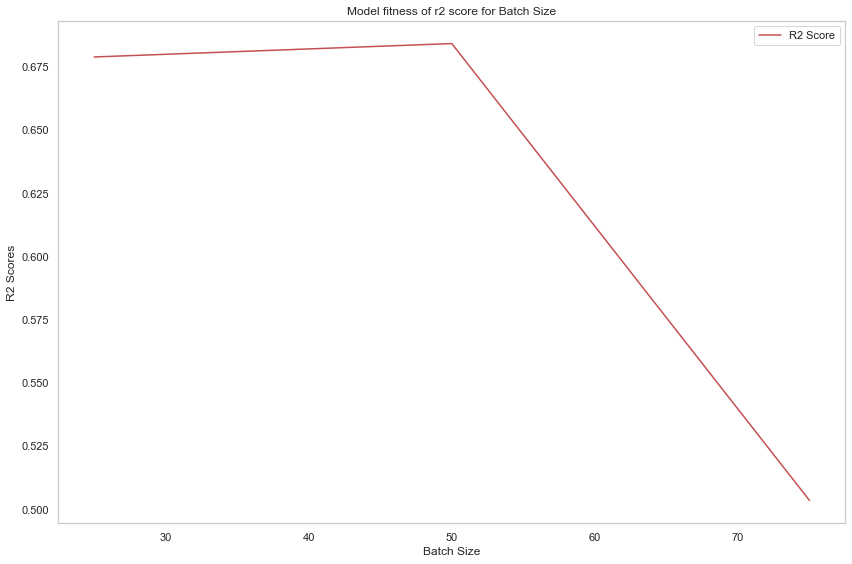

In [89]:
# plotting mimimum loss of each model for a specified batch size over all epochs
plotloss(batch_size,test_loss,train_loss,'Batch size')
plotR2Score(batch_size,r2,'Batch Size')

## 6.3 Optimizer vs Learning Rate with Losses

Optimizers chosen are Adam, SGD and AdaGrad.

they are tuned aganist learing rates 0.001,0.01,0.1

('for Optimizer', 'adam', 'and lr = ', 0.001)
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_36 (Dropout)        (None, 87)                0         
                                                                 
 dense_107 (Dense)           (None, 16)                1408      
                                                                 
 dense_108 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_36 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_109 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,729
Non-trainable params: 32
____

No handles with labels found to put in legend.


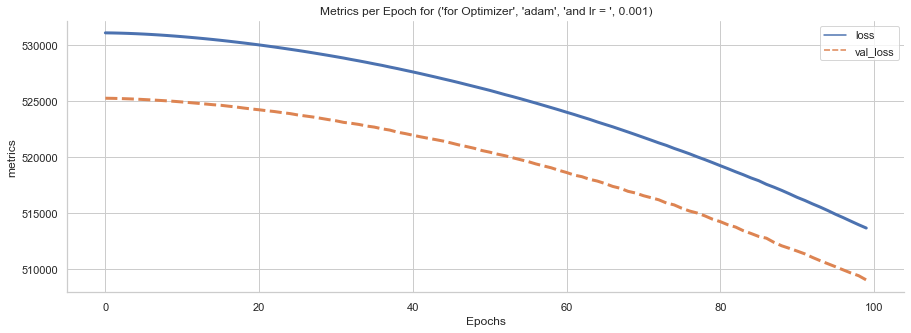

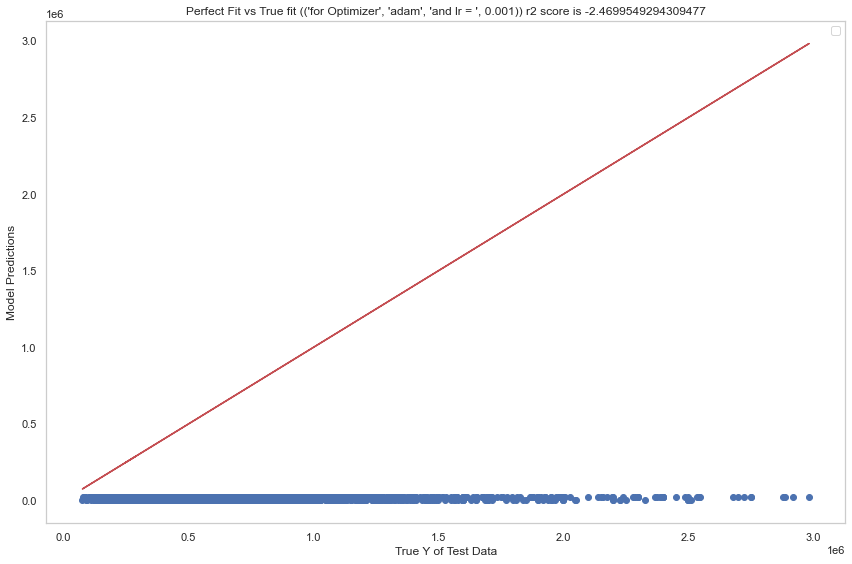

203/203 [==============================] - 0s 1ms/step - loss: 520976.3438 - mean_absolute_error: 520976.3438 - mean_squared_error: 381477158912.0000
('for Optimizer', 'adam', 'and lr = ', 0.01)
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_37 (Dropout)        (None, 87)                0         
                                                                 
 dense_110 (Dense)           (None, 16)                1408      
                                                                 
 dense_111 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_37 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_112 (Dense)           (None, 1)                 1

No handles with labels found to put in legend.


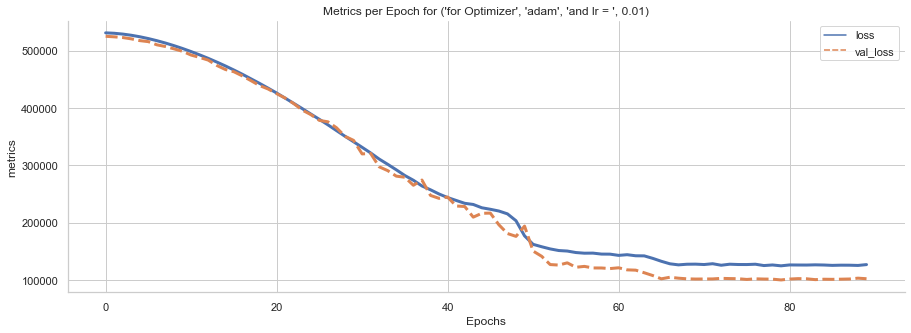

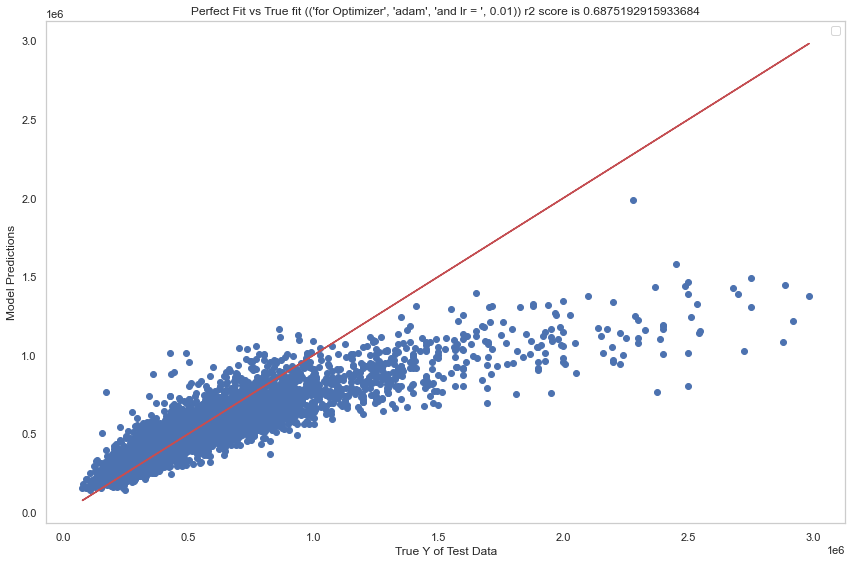

203/203 [==============================] - 0s 1ms/step - loss: 100319.9688 - mean_absolute_error: 100319.9688 - mean_squared_error: 34353246208.0000
('for Optimizer', 'adam', 'and lr = ', 0.1)
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_38 (Dropout)        (None, 87)                0         
                                                                 
 dense_113 (Dense)           (None, 16)                1408      
                                                                 
 dense_114 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_38 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_115 (Dense)           (None, 1)                 17 

No handles with labels found to put in legend.


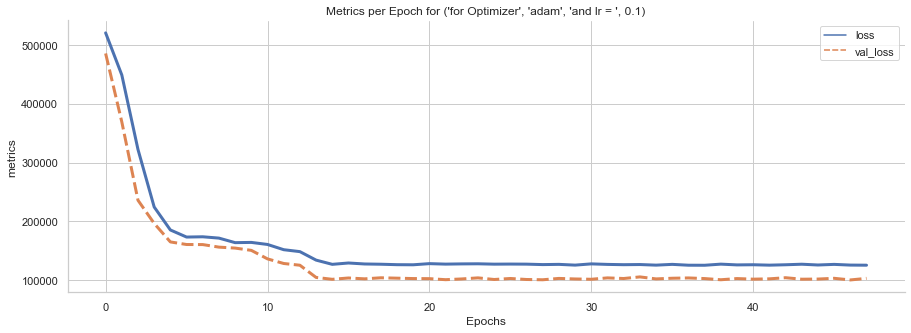

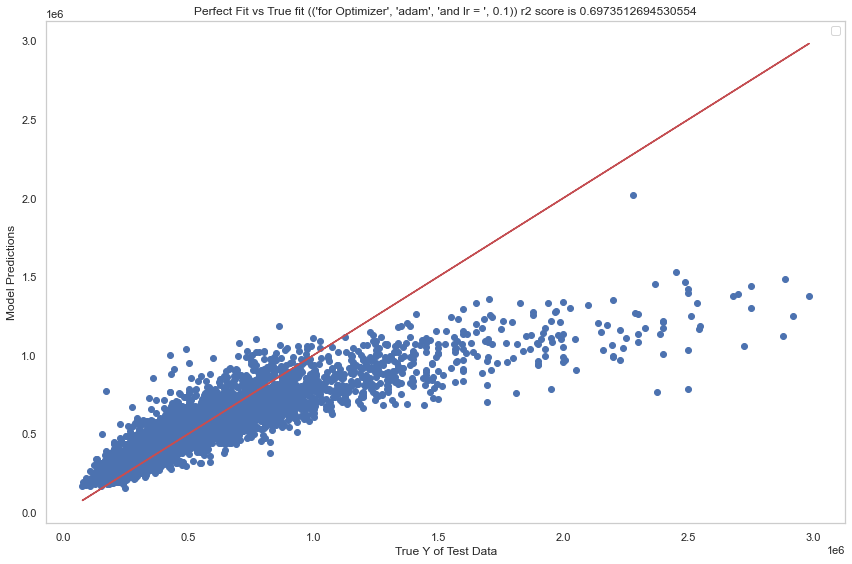

203/203 [==============================] - 0s 1ms/step - loss: 102903.3203 - mean_absolute_error: 102903.3203 - mean_squared_error: 33272334336.0000
('for Optimizer', 'adagrad', 'and lr = ', 0.001)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_39 (Dropout)        (None, 87)                0         
                                                                 
 dense_116 (Dense)           (None, 16)                1408      
                                                                 
 dense_117 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_39 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_118 (Dense)           (None, 1)               

No handles with labels found to put in legend.


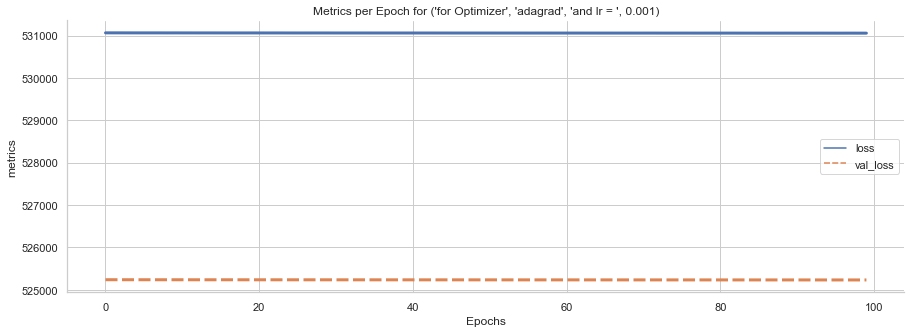

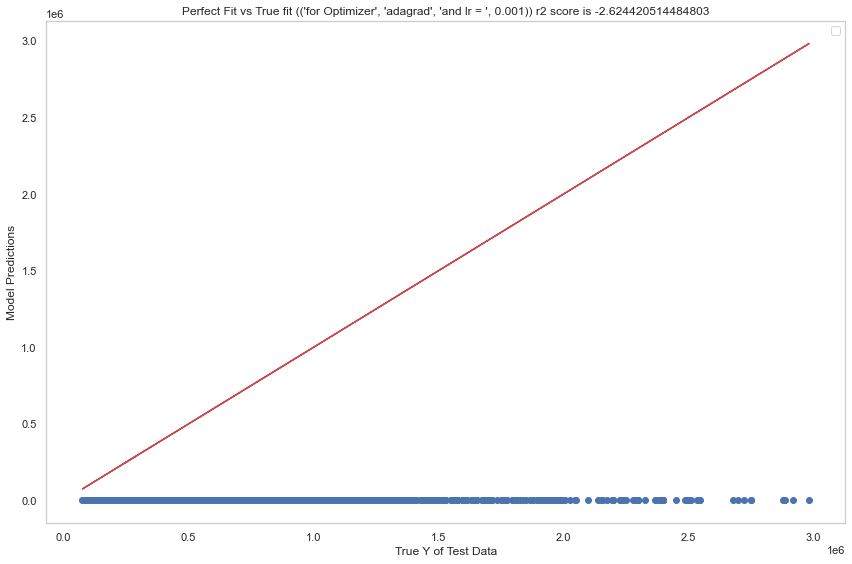

203/203 [==============================] - 0s 1ms/step - loss: 537142.1250 - mean_absolute_error: 537142.1250 - mean_squared_error: 398458519552.0000
('for Optimizer', 'adagrad', 'and lr = ', 0.01)
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_40 (Dropout)        (None, 87)                0         
                                                                 
 dense_119 (Dense)           (None, 16)                1408      
                                                                 
 dense_120 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_40 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_121 (Dense)           (None, 1)               

No handles with labels found to put in legend.


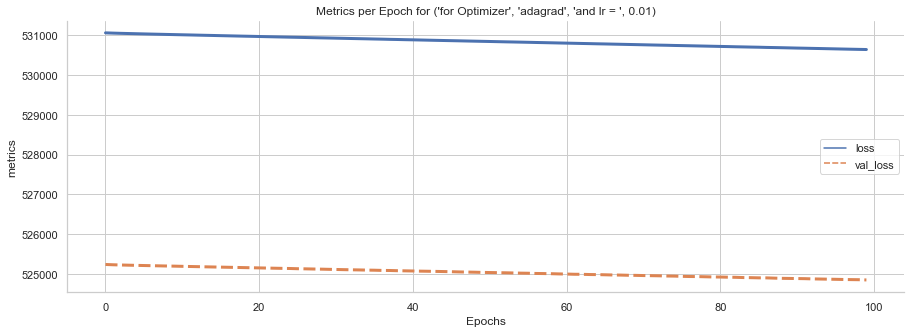

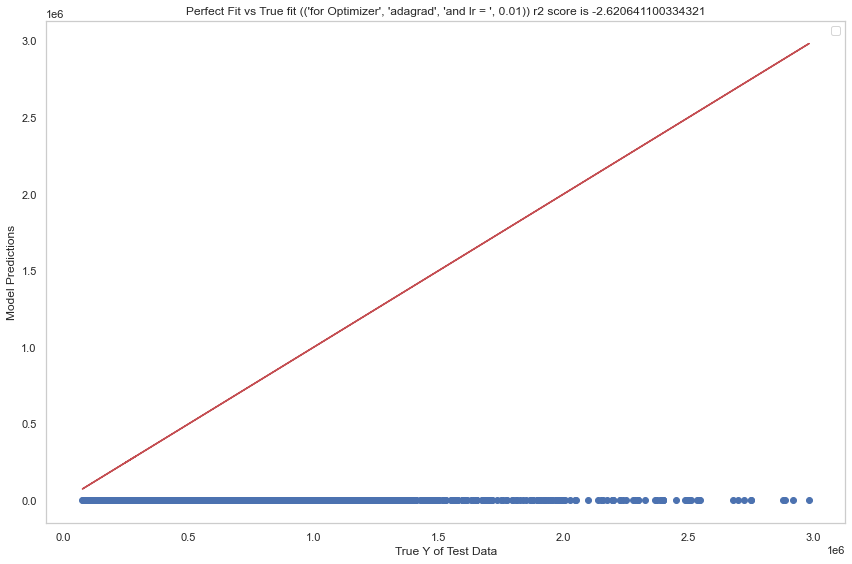

203/203 [==============================] - 0s 1ms/step - loss: 536754.8125 - mean_absolute_error: 536754.8125 - mean_squared_error: 398043021312.0000
('for Optimizer', 'adagrad', 'and lr = ', 0.1)
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_41 (Dropout)        (None, 87)                0         
                                                                 
 dense_122 (Dense)           (None, 16)                1408      
                                                                 
 dense_123 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_41 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_124 (Dense)           (None, 1)                

No handles with labels found to put in legend.


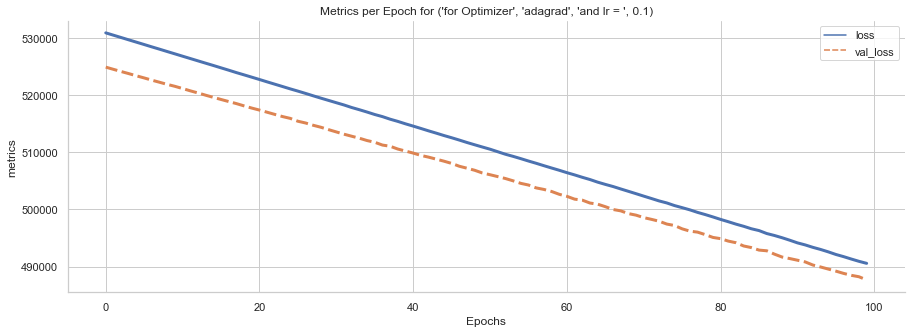

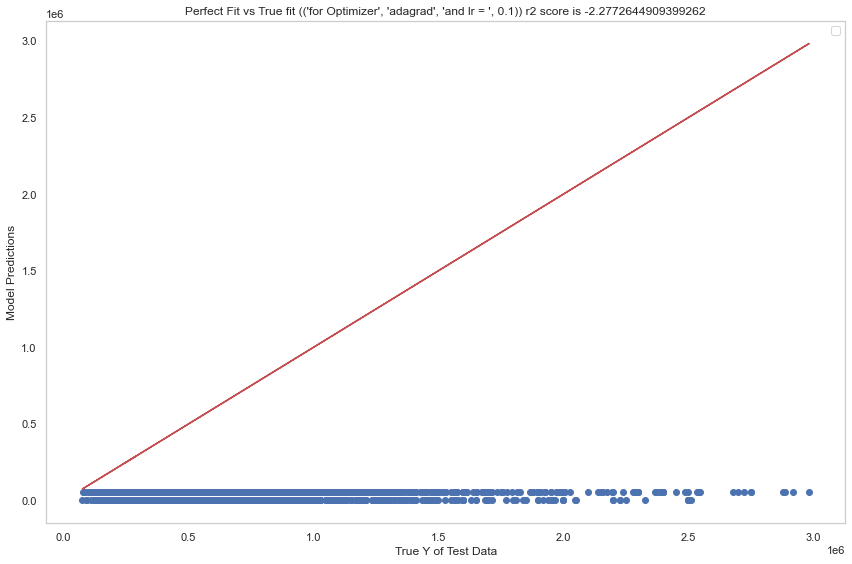

203/203 [==============================] - 0s 1ms/step - loss: 499687.3438 - mean_absolute_error: 499687.3438 - mean_squared_error: 360293203968.0000
('for Optimizer', 'sgd', 'and lr = ', 0.001)
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_42 (Dropout)        (None, 87)                0         
                                                                 
 dense_125 (Dense)           (None, 16)                1408      
                                                                 
 dense_126 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_42 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_127 (Dense)           (None, 1)                 1

No handles with labels found to put in legend.


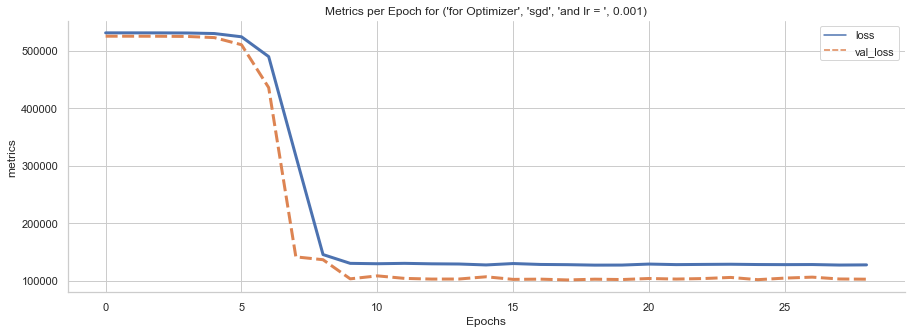

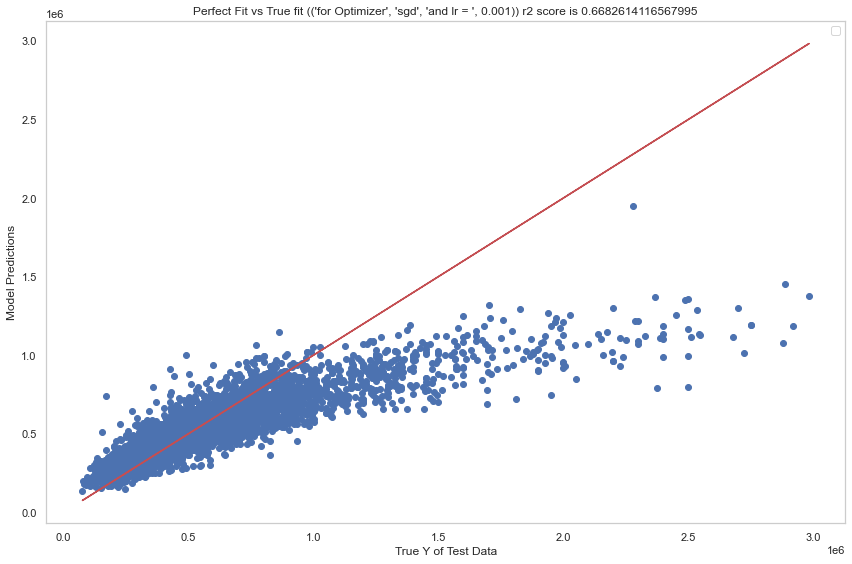

203/203 [==============================] - 0s 1ms/step - loss: 103014.6328 - mean_absolute_error: 103014.6328 - mean_squared_error: 36470411264.0000
('for Optimizer', 'sgd', 'and lr = ', 0.01)
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_43 (Dropout)        (None, 87)                0         
                                                                 
 dense_128 (Dense)           (None, 16)                1408      
                                                                 
 dense_129 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_43 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_130 (Dense)           (None, 1)                 17 

No handles with labels found to put in legend.


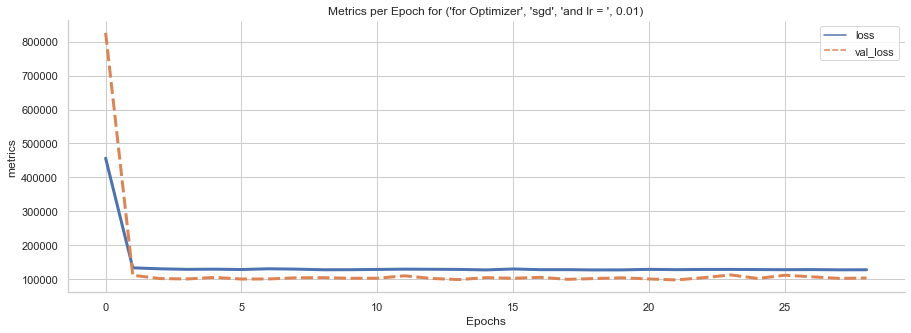

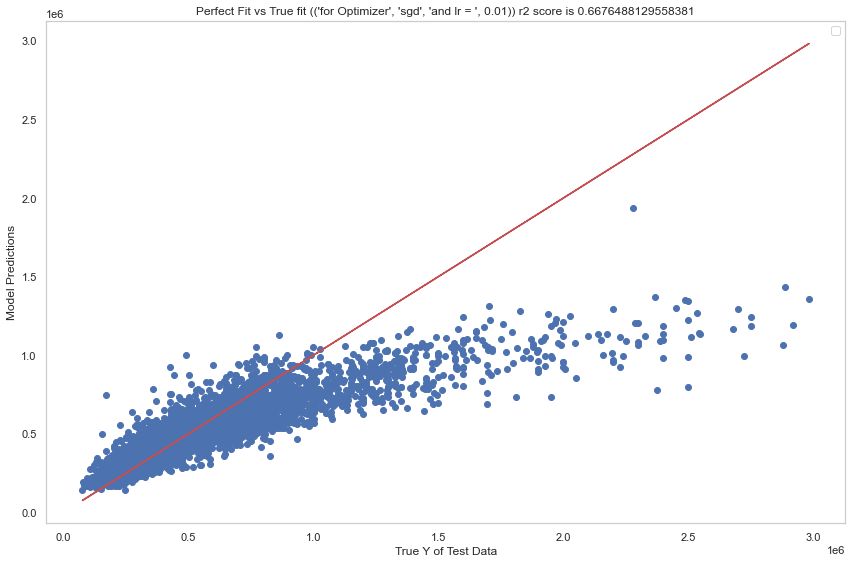

203/203 [==============================] - 0s 1ms/step - loss: 102302.7500 - mean_absolute_error: 102302.7500 - mean_squared_error: 36537761792.0000
('for Optimizer', 'sgd', 'and lr = ', 0.1)
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_44 (Dropout)        (None, 87)                0         
                                                                 
 dense_131 (Dense)           (None, 16)                1408      
                                                                 
 dense_132 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_44 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_133 (Dense)           (None, 1)                 17  

No handles with labels found to put in legend.


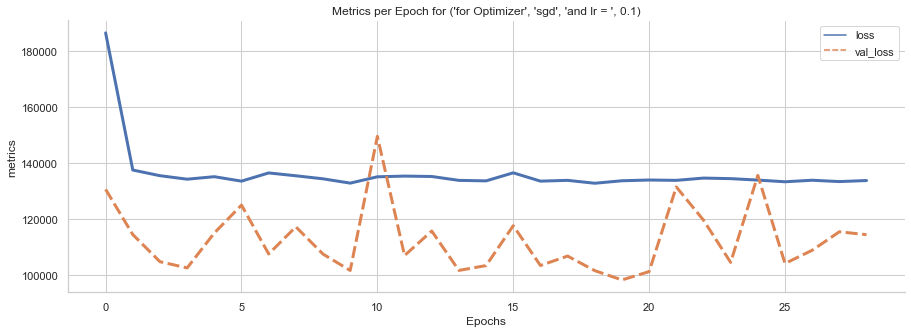

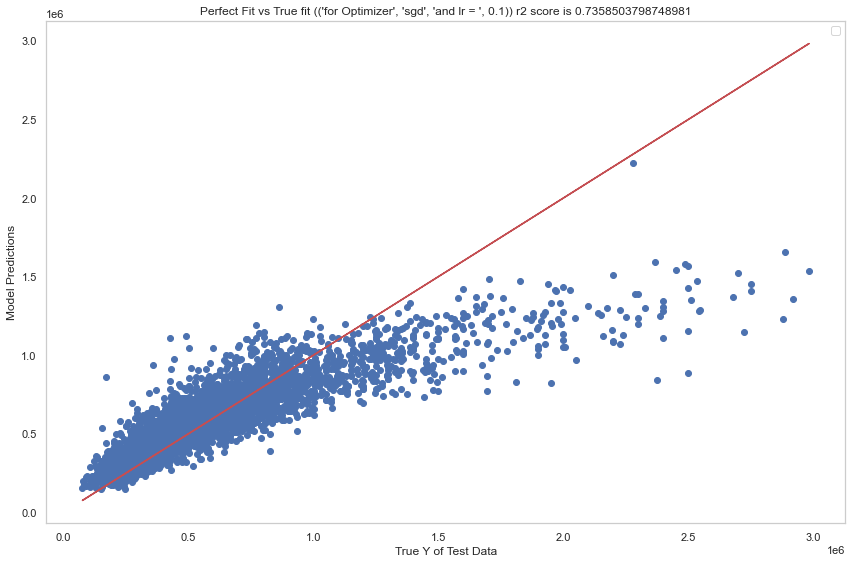

203/203 [==============================] - 0s 1ms/step - loss: 101582.5000 - mean_absolute_error: 101582.5000 - mean_squared_error: 29039867904.0000
('for Optimizer', 'RMSprop', 'and lr = ', 0.001)
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_45 (Dropout)        (None, 87)                0         
                                                                 
 dense_134 (Dense)           (None, 16)                1408      
                                                                 
 dense_135 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_45 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_136 (Dense)           (None, 1)               

No handles with labels found to put in legend.


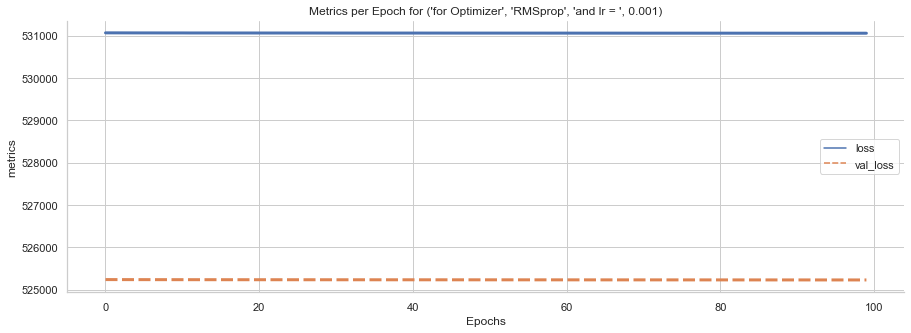

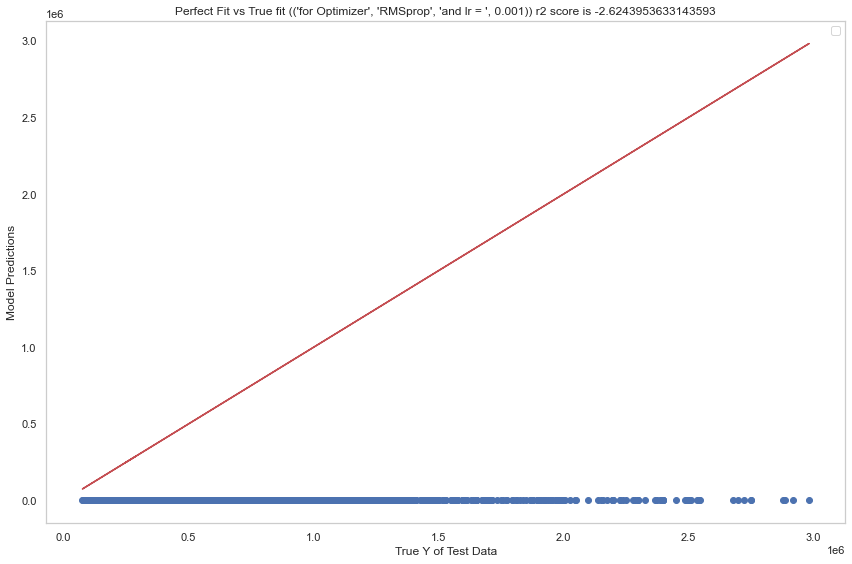

203/203 [==============================] - 0s 1ms/step - loss: 537139.1875 - mean_absolute_error: 537139.1875 - mean_squared_error: 398455603200.0000
('for Optimizer', 'RMSprop', 'and lr = ', 0.01)
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_46 (Dropout)        (None, 87)                0         
                                                                 
 dense_137 (Dense)           (None, 16)                1408      
                                                                 
 dense_138 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_46 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_139 (Dense)           (None, 1)               

No handles with labels found to put in legend.


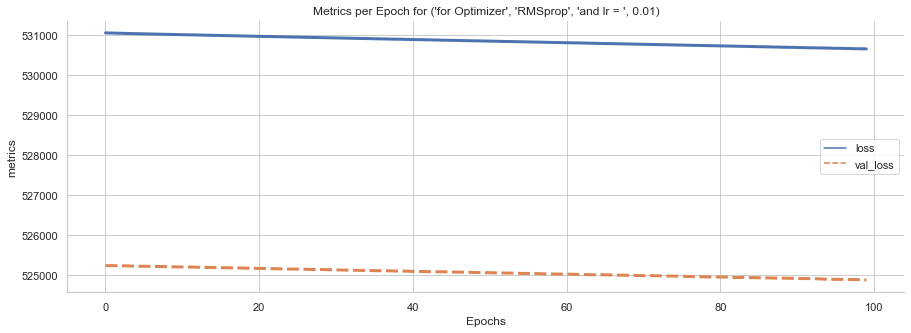

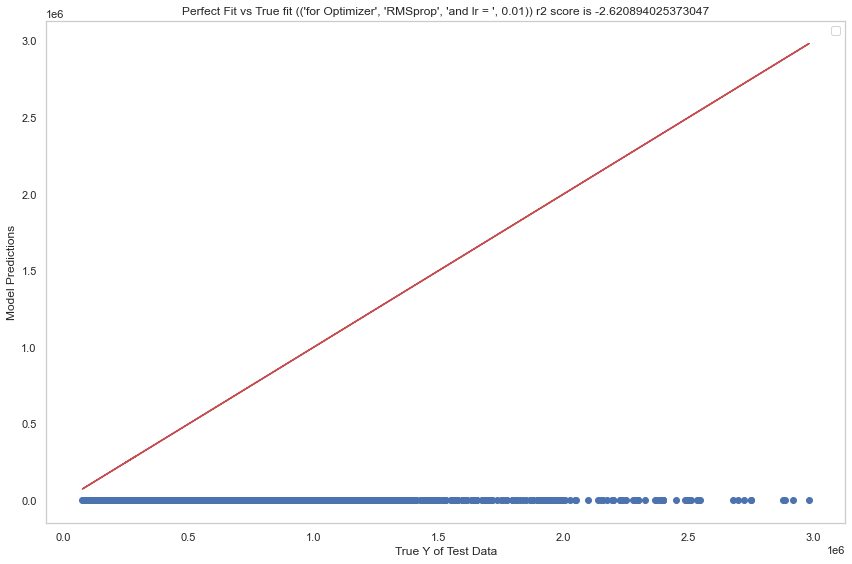

203/203 [==============================] - 0s 1ms/step - loss: 536774.6250 - mean_absolute_error: 536774.6250 - mean_squared_error: 398070644736.0000
('for Optimizer', 'RMSprop', 'and lr = ', 0.1)
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_47 (Dropout)        (None, 87)                0         
                                                                 
 dense_140 (Dense)           (None, 16)                1408      
                                                                 
 dense_141 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_47 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_142 (Dense)           (None, 1)                

No handles with labels found to put in legend.


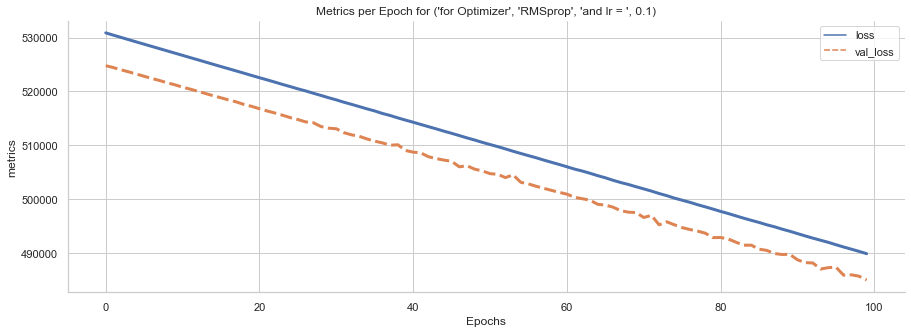

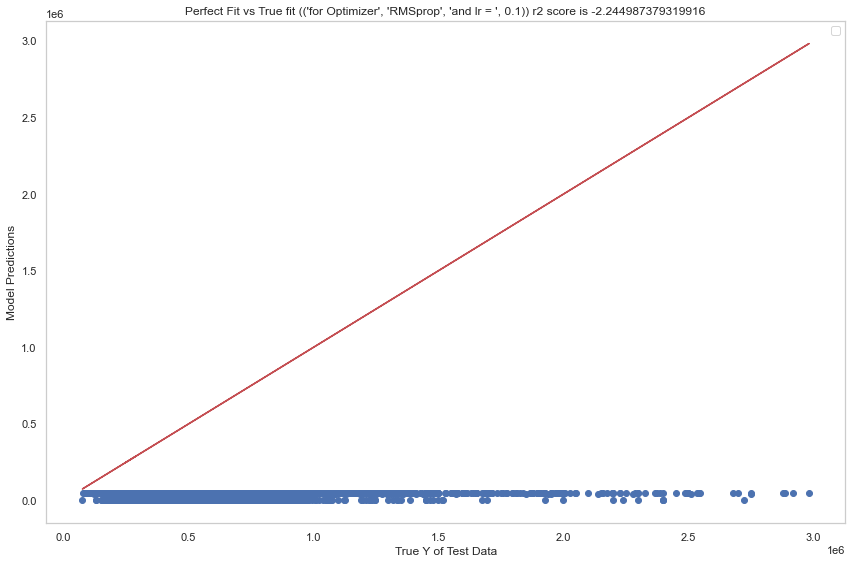

203/203 [==============================] - 0s 1ms/step - loss: 496478.5312 - mean_absolute_error: 496478.5312 - mean_squared_error: 356744757248.0000


In [90]:
optimizers = ['adam','adagrad','sgd','RMSprop']
learning_rate = [0.001,0.01,0.1]
test_loss =[]
train_loss = []
r2=[]
for i in optimizers:
  for j in learning_rate:
    title = 'for Optimizer',i,'and lr = ',j
    print(title)
    model,loss = keras_model(layers=2,neurons=16,hid_activation='linear',dense_activation='relu',optimizer=i,loss='mean_absolute_error',size=50,epoch=100,lr = j,title = title)
    bLoss = min(loss['loss'])
    train_loss.append(bLoss)
    test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
    r2.append(plotModelFitness(model,title))


plot R2 score for each optimizer and learning rate

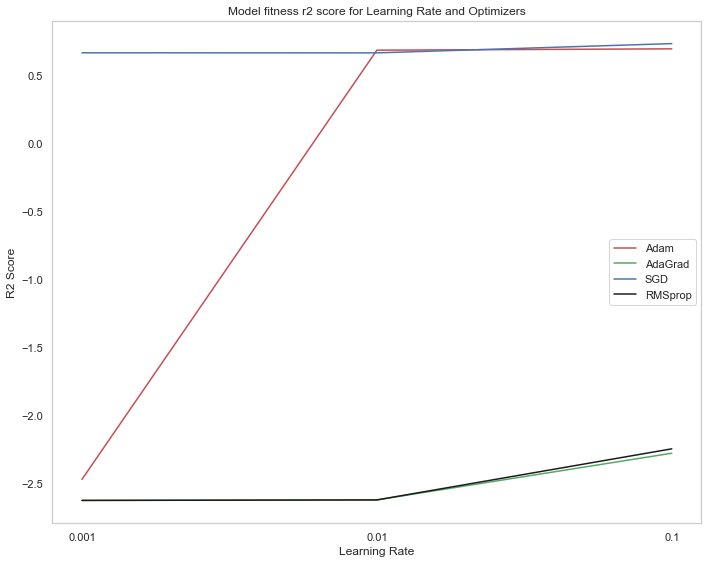

In [91]:
ler = ['0.001','0.01','0.1']
plt.figure(figsize=(10,8))
# since scores of each optimizer and learning rates are stored in a list. first 3 belongs to adam, next 3 to Adagrad and so on
plt.plot(ler,r2[0:3],label = 'Adam',c='r')
plt.plot(ler,r2[3:6],label = 'AdaGrad',c='g')
plt.plot(ler,r2[6:9],label = 'SGD',c='b')
plt.plot(ler,r2[9:12],label = 'RMSprop',c='k')
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('Model fitness r2 score for Learning Rate and Optimizers')
plt.legend()
plt.tight_layout()
plt.show()

Plot test loss of learning rate and optimizer against loss

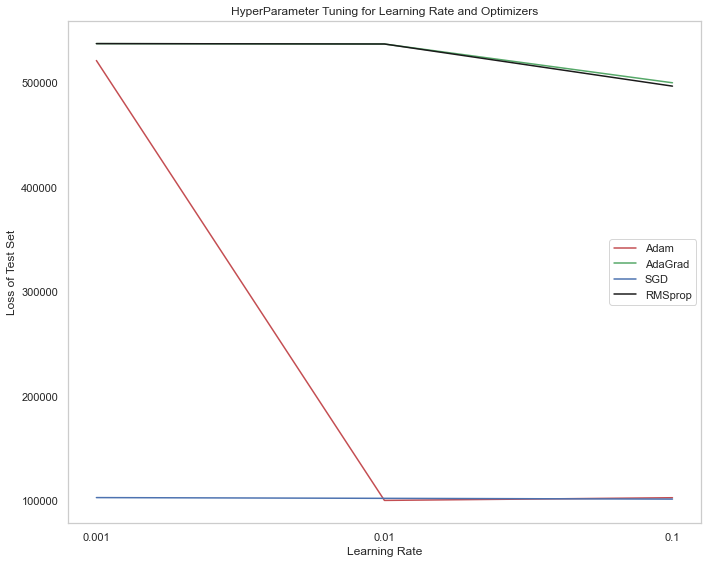

In [92]:
plt.figure(figsize=(10,8))
# since losses of each optimizer and learning rates are stored in a list. first 3 belongs to adam, next 3 to Adagrad and so on
plt.plot(ler,test_loss[0:3],label = 'Adam',c='r')
plt.plot(ler,test_loss[3:6],label = 'AdaGrad',c='g')
plt.plot(ler,test_loss[6:9],label = 'SGD',c='b')
plt.plot(ler,test_loss[9:12],label = 'RMSprop',c='k')
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Loss of Test Set')
plt.title('HyperParameter Tuning for Learning Rate and Optimizers')
plt.legend()
plt.tight_layout()
plt.show()

Plot Train loss of learning rate and optimizer against loss

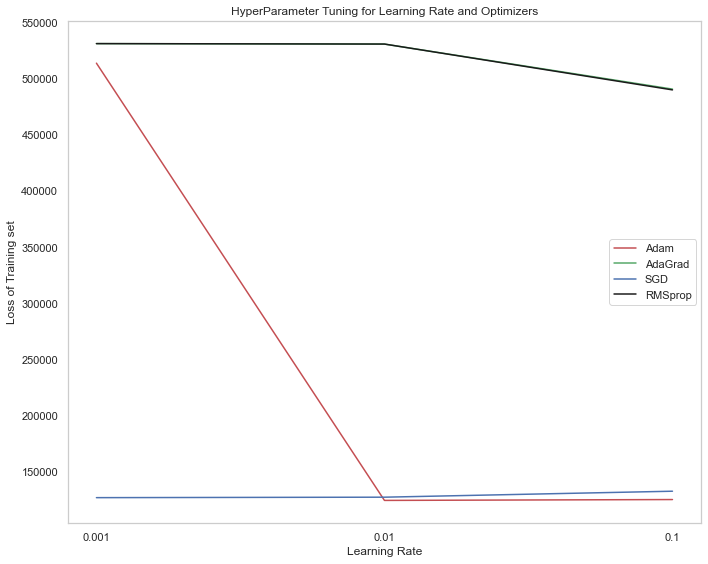

In [93]:
plt.figure(figsize=(10,8))
# since losses of each optimizer and learning rates are stored in a list. first 3 belongs to adam, next 3 to Adagrad and so on
plt.plot(ler,train_loss[0:3],label = 'Adam',c='r')
plt.plot(ler,train_loss[3:6],label = 'AdaGrad',c='g')
plt.plot(ler,train_loss[6:9],label = 'SGD',c='b')
plt.plot(ler,train_loss[9:12],label = 'RMSprop',c='k')
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Loss of Training set')
plt.title('HyperParameter Tuning for Learning Rate and Optimizers')
plt.legend()
plt.tight_layout()
plt.show()

## 6.4 Activation function vs losses

for Activation Function: relu
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_48 (Dropout)        (None, 87)                0         
                                                                 
 dense_143 (Dense)           (None, 16)                1408      
                                                                 
 dense_144 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_48 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_145 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,729
Non-trainable params: 32
____________________

No handles with labels found to put in legend.


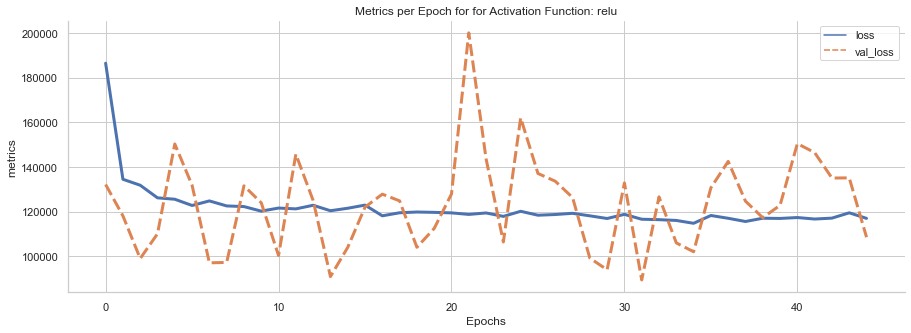

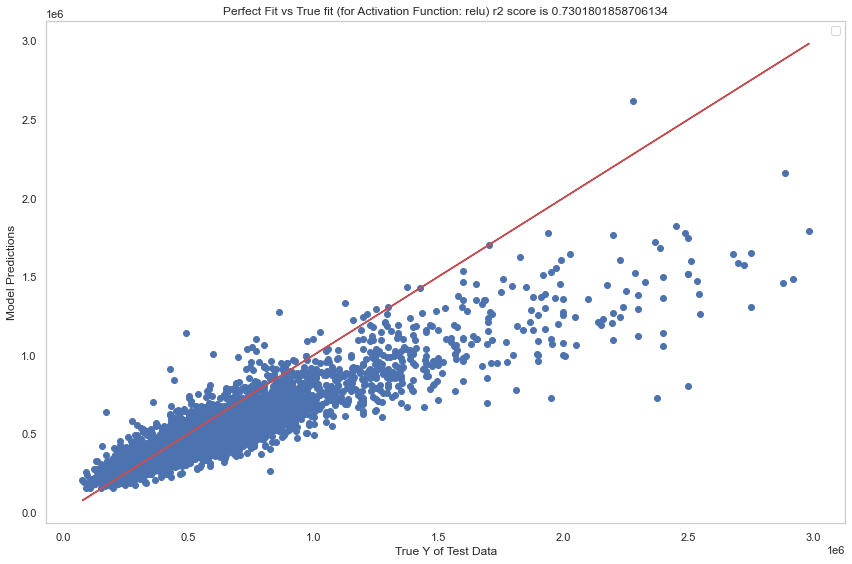

203/203 [==============================] - 0s 1ms/step - loss: 101818.5391 - mean_absolute_error: 101818.5391 - mean_squared_error: 29663229952.0000
for Activation Function: linear
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_49 (Dropout)        (None, 87)                0         
                                                                 
 dense_146 (Dense)           (None, 16)                1408      
                                                                 
 dense_147 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_49 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_148 (Dense)           (None, 1)                 17        
    

No handles with labels found to put in legend.


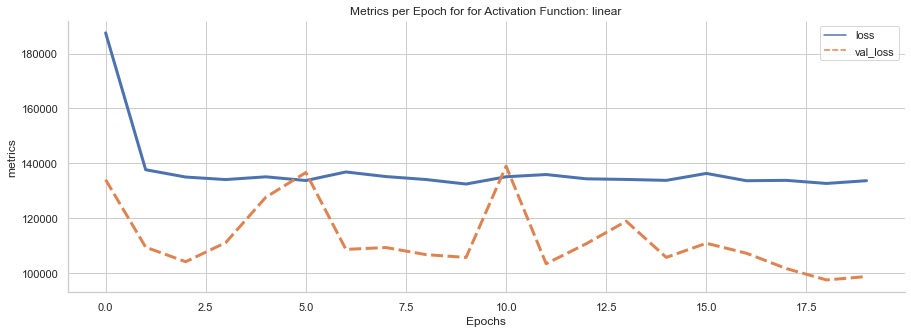

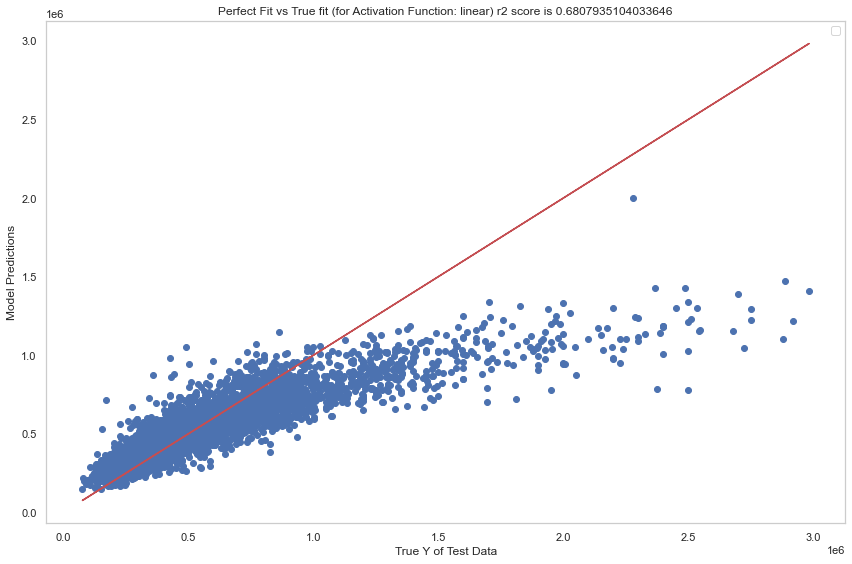

203/203 [==============================] - 0s 1ms/step - loss: 105262.3438 - mean_absolute_error: 105262.3438 - mean_squared_error: 35092656128.0000
for Activation Function: <keras.layers.advanced_activations.LeakyReLU object at 0x000002D61B4A9EB0>
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_50 (Dropout)        (None, 87)                0         
                                                                 
 dense_149 (Dense)           (None, 16)                1408      
                                                                 
 dense_150 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_50 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 d

No handles with labels found to put in legend.


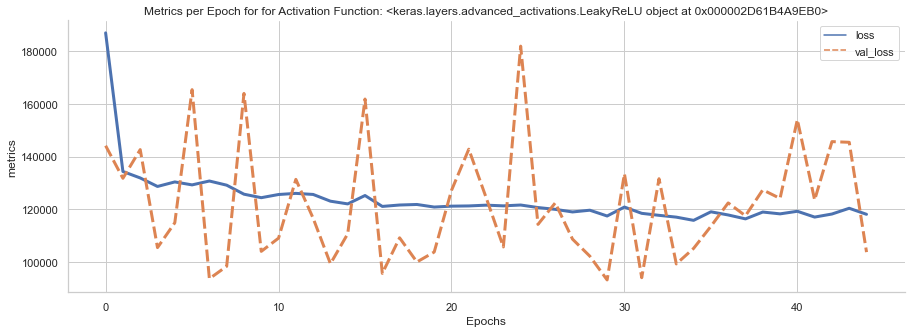

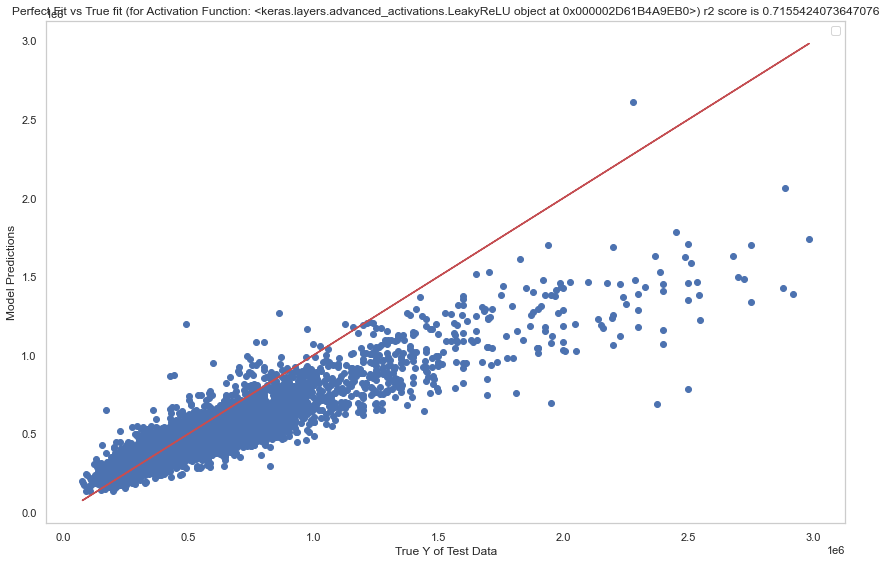

203/203 [==============================] - 0s 1ms/step - loss: 104912.1094 - mean_absolute_error: 104912.1094 - mean_squared_error: 31272460288.0000


In [94]:
leak = keras.layers.LeakyReLU(alpha=0.01)
activation = ['relu','linear',leak]
test_loss=[]
train_loss=[]
r2 = []
for act in activation:
  title = 'for Activation Function: {}'.format(act)
  print(title)
  model,loss = keras_model(layers=2,neurons=16,hid_activation=act,dense_activation='relu',optimizer='sgd',loss='mean_absolute_error',size=50,epoch=100,lr = 0.1,title = title)
  bLoss = min(loss['loss'])
  train_loss.append(bLoss)
  test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
  r2.append(plotModelFitness(model,title))

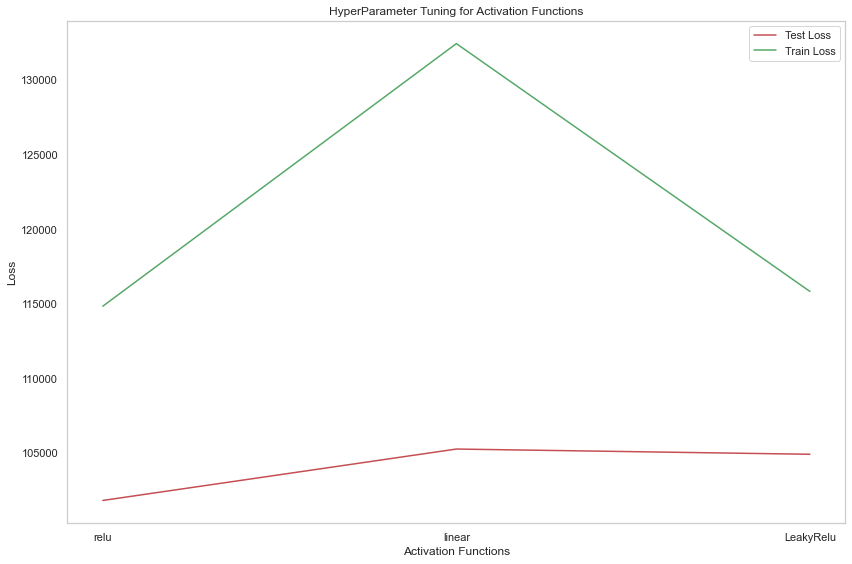

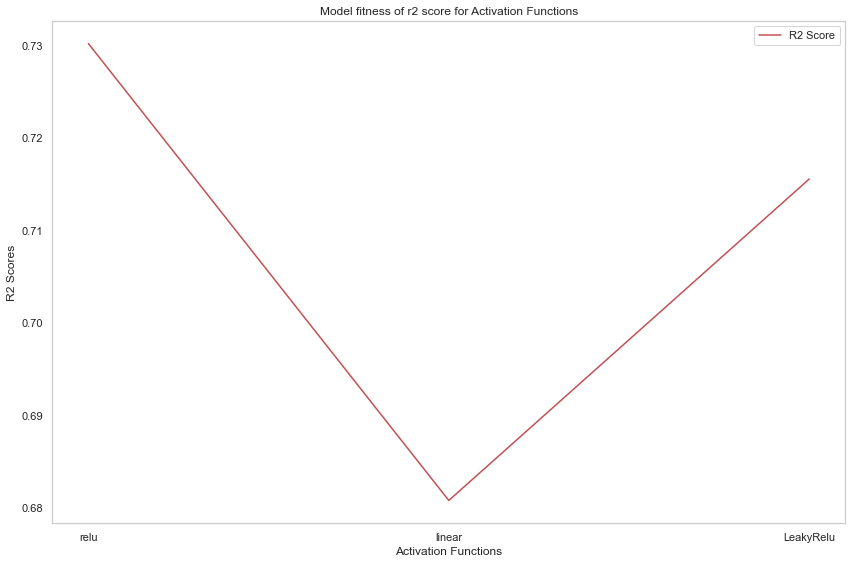

In [95]:
activation = ['relu','linear','LeakyRelu']
plotloss(activation,test_loss,train_loss,'Activation Functions')
plotR2Score(activation,r2,'Activation Functions')


## 6.5 Loss Function vs Error

for Loss Function: mean_absolute_error
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_67 (Dropout)        (None, 87)                0         
                                                                 
 dense_200 (Dense)           (None, 16)                1408      
                                                                 
 dense_201 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_67 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_202 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,729
Non-trainable params: 32
___________

No handles with labels found to put in legend.


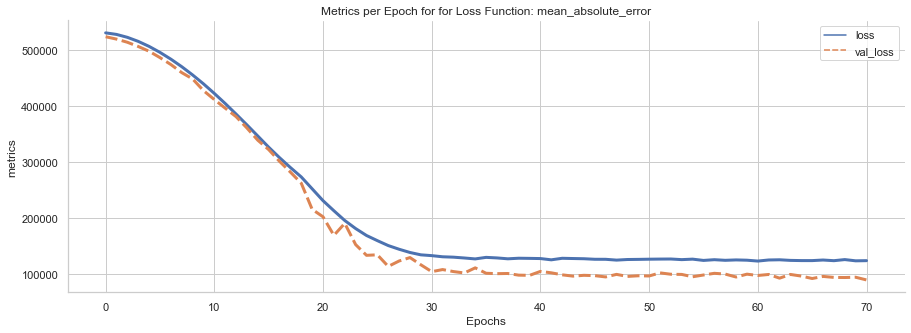

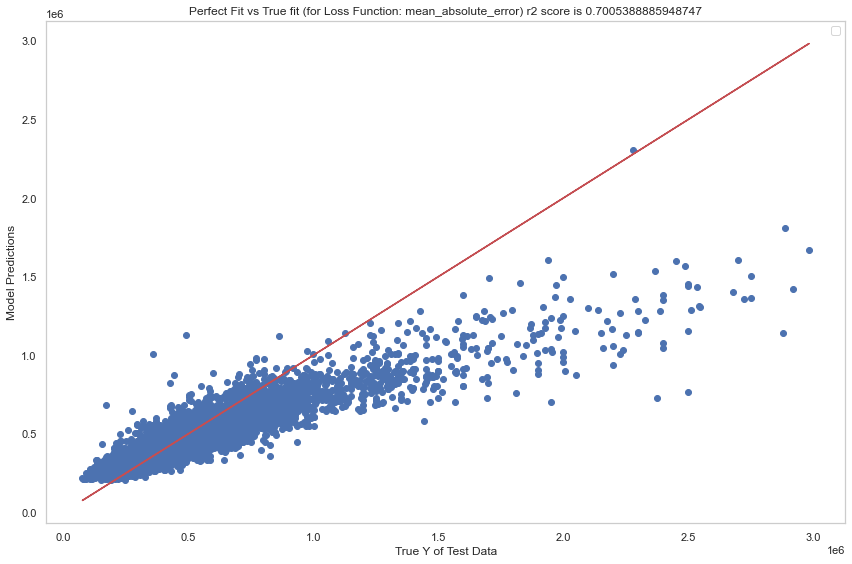

203/203 [==============================] - 0s 1ms/step - loss: 99169.0156 - mean_absolute_error: 99169.0156 - mean_squared_error: 32921913344.0000
for Loss Function: mean_squared_error
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_68 (Dropout)        (None, 87)                0         
                                                                 
 dense_203 (Dense)           (None, 16)                1408      
                                                                 
 dense_204 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_68 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_205 (Dense)           (None, 1)                 17        


No handles with labels found to put in legend.


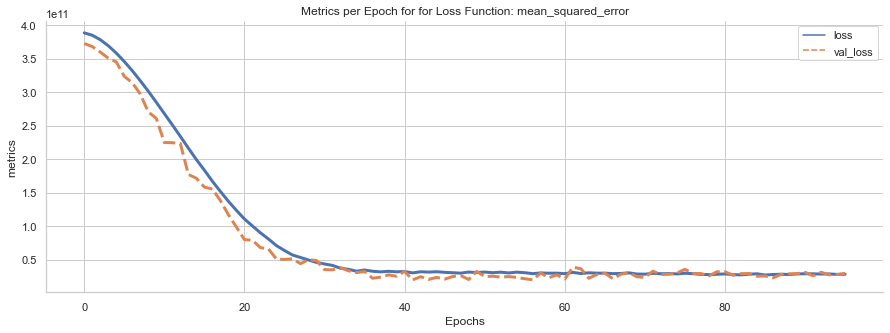

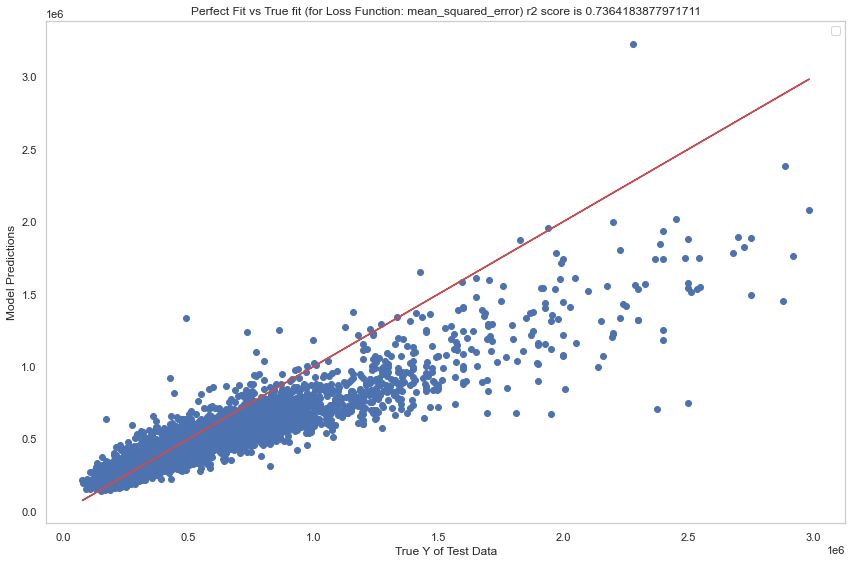

203/203 [==============================] - 0s 1ms/step - loss: 28977410048.0000 - mean_absolute_error: 101322.6328 - mean_squared_error: 28977410048.0000


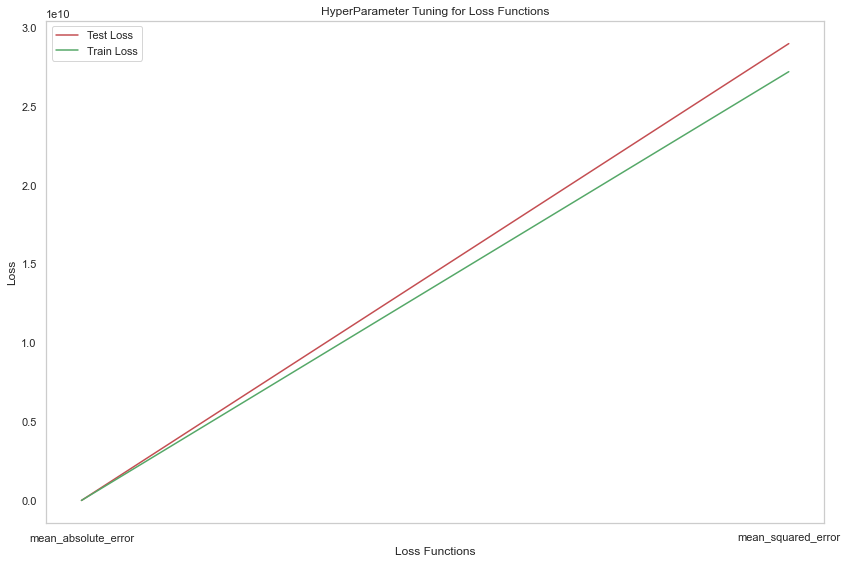

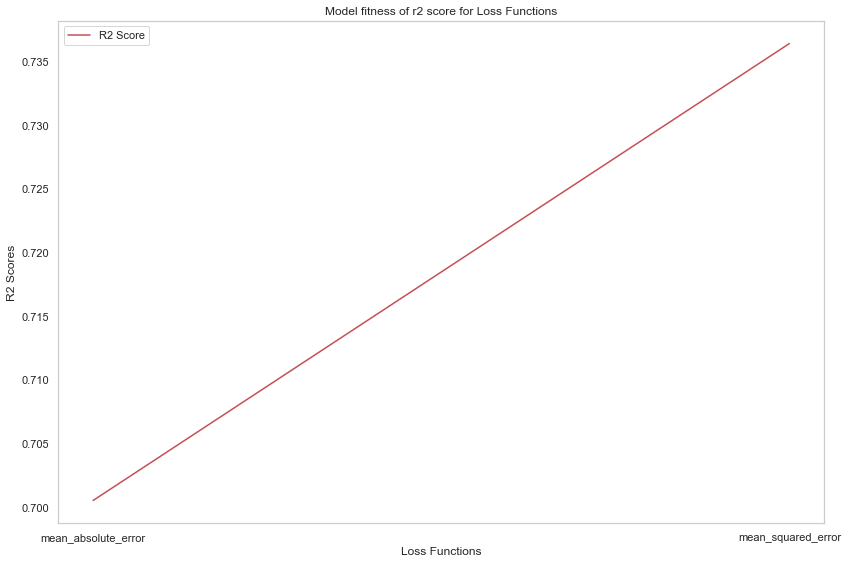

In [105]:
lossFunctions = ['mean_absolute_error','mean_squared_error']
test_loss=[]
train_loss=[]
r2 = []
for l in lossFunctions:
  title = 'for Loss Function: {}'.format(l)
  print(title)
  model,loss = keras_model(layers=2,neurons=16,hid_activation='relu',dense_activation='relu',optimizer='adam',loss=l,size=25,epoch=100,lr = 0.01,title = title)
  bLoss = min(loss['loss'])
  train_loss.append(bLoss)
  test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
  r2.append(plotModelFitness(model,title))
plotloss(lossFunctions,test_loss,train_loss,'Loss Functions')
plotR2Score(lossFunctions,r2,'Loss Functions')

## 6.6 Hidden Layers vs Losses

for Number Hidden Layers: 1
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_69 (Dropout)        (None, 87)                0         
                                                                 
 dense_206 (Dense)           (None, 16)                1408      
                                                                 
 batch_normalization_69 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_207 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,489
Trainable params: 1,457
Non-trainable params: 32
_________________________________________________________________
203/203 [==============================] - 0s 993us/step - loss: 38902972416.0000 - mean

No handles with labels found to put in legend.


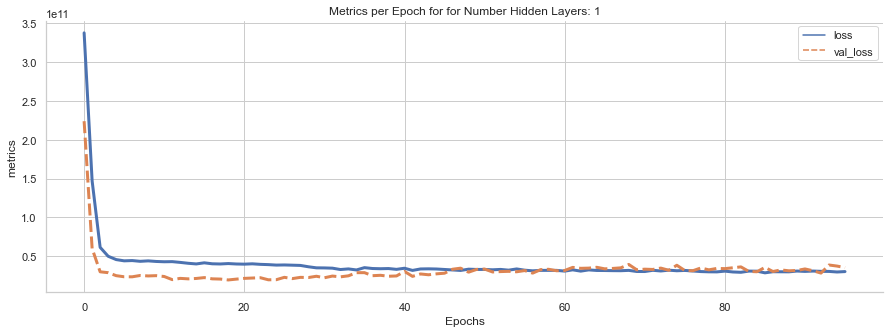

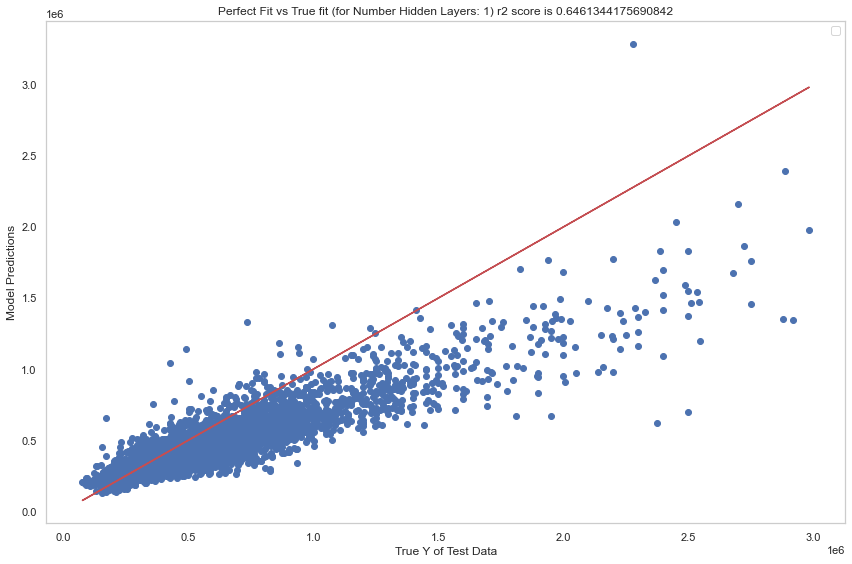

203/203 [==============================] - 0s 978us/step - loss: 38902972416.0000 - mean_absolute_error: 124507.2188 - mean_squared_error: 38902972416.0000
for Number Hidden Layers: 2
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_70 (Dropout)        (None, 87)                0         
                                                                 
 dense_208 (Dense)           (None, 16)                1408      
                                                                 
 dense_209 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_70 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_210 (Dense)           (None, 1)                 17        
 

No handles with labels found to put in legend.


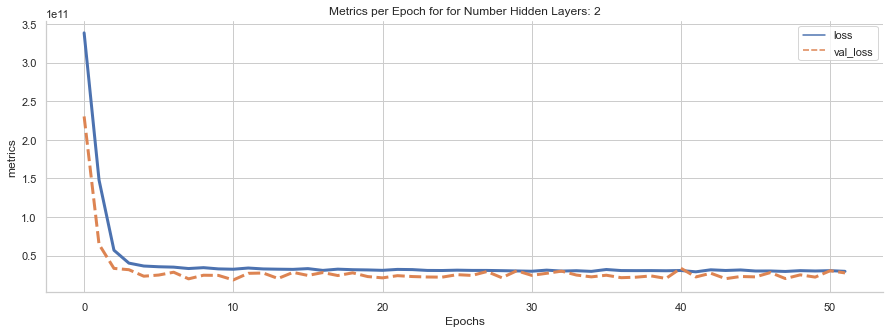

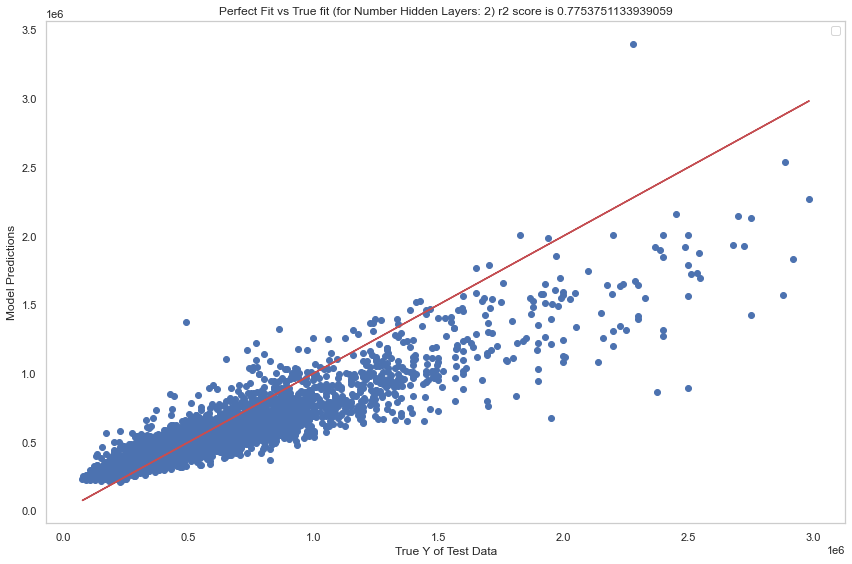

203/203 [==============================] - 0s 1ms/step - loss: 24694628352.0000 - mean_absolute_error: 100597.3438 - mean_squared_error: 24694628352.0000
for Number Hidden Layers: 3
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_71 (Dropout)        (None, 87)                0         
                                                                 
 dense_211 (Dense)           (None, 16)                1408      
                                                                 
 dense_212 (Dense)           (None, 16)                272       
                                                                 
 dense_213 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_71 (Bat  (None, 16)               64        
 chNormalization)                                                
   

No handles with labels found to put in legend.


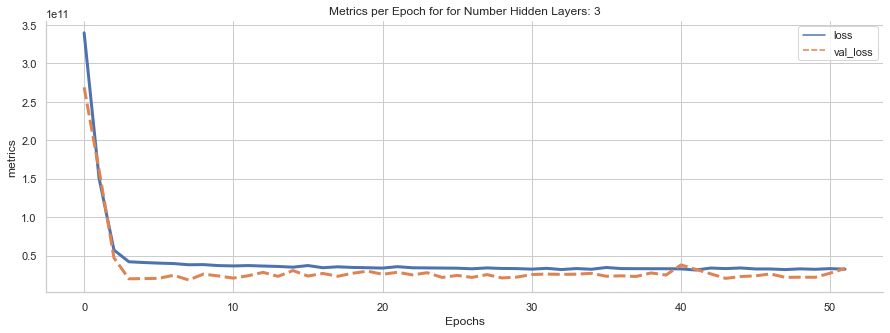

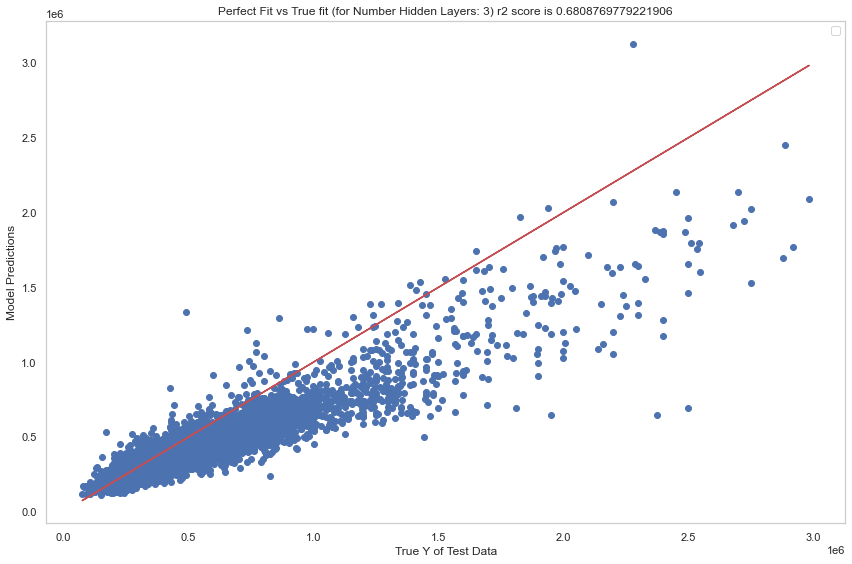

203/203 [==============================] - 0s 1ms/step - loss: 35083481088.0000 - mean_absolute_error: 126230.7422 - mean_squared_error: 35083481088.0000
for Number Hidden Layers: 4
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_72 (Dropout)        (None, 87)                0         
                                                                 
 dense_215 (Dense)           (None, 16)                1408      
                                                                 
 dense_216 (Dense)           (None, 16)                272       
                                                                 
 dense_217 (Dense)           (None, 16)                272       
                                                                 
 dense_218 (Dense)           (None, 16)                272       
                                                                 
 ba

No handles with labels found to put in legend.


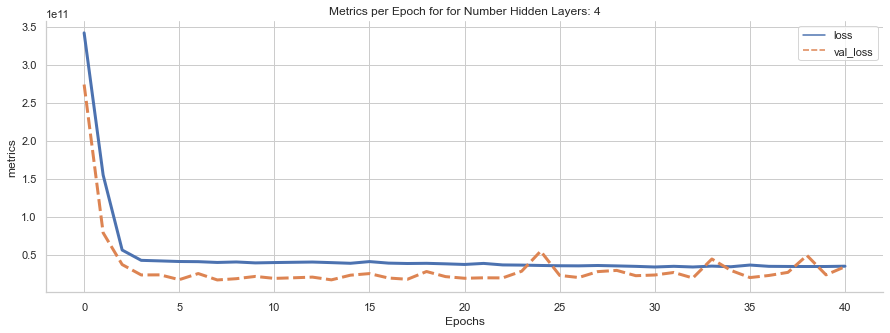

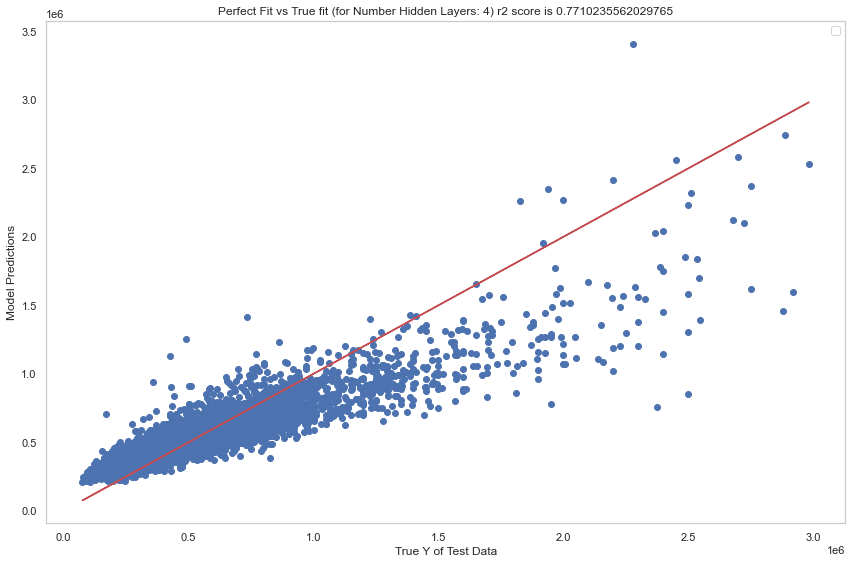

203/203 [==============================] - 0s 1ms/step - loss: 25173020672.0000 - mean_absolute_error: 100612.4609 - mean_squared_error: 25173020672.0000
for Number Hidden Layers: 5
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_73 (Dropout)        (None, 87)                0         
                                                                 
 dense_220 (Dense)           (None, 16)                1408      
                                                                 
 dense_221 (Dense)           (None, 16)                272       
                                                                 
 dense_222 (Dense)           (None, 16)                272       
                                                                 
 dense_223 (Dense)           (None, 16)                272       
                                                                 
 de

No handles with labels found to put in legend.


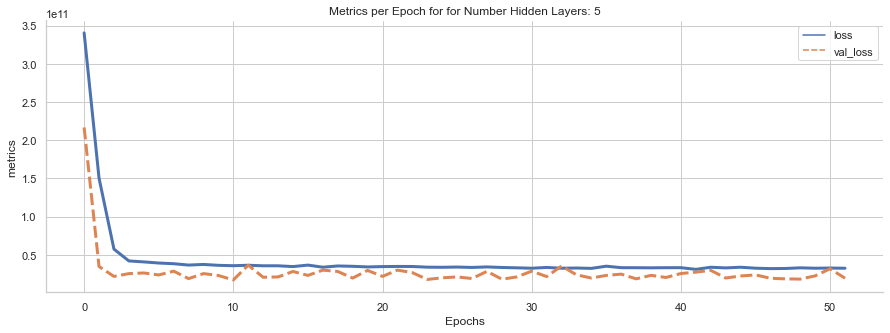

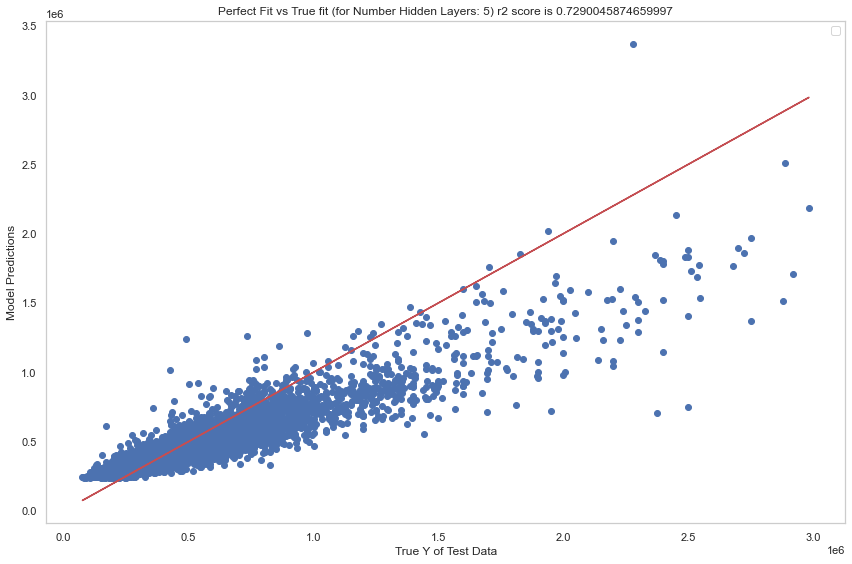

203/203 [==============================] - 0s 2ms/step - loss: 29792471040.0000 - mean_absolute_error: 106000.7812 - mean_squared_error: 29792471040.0000


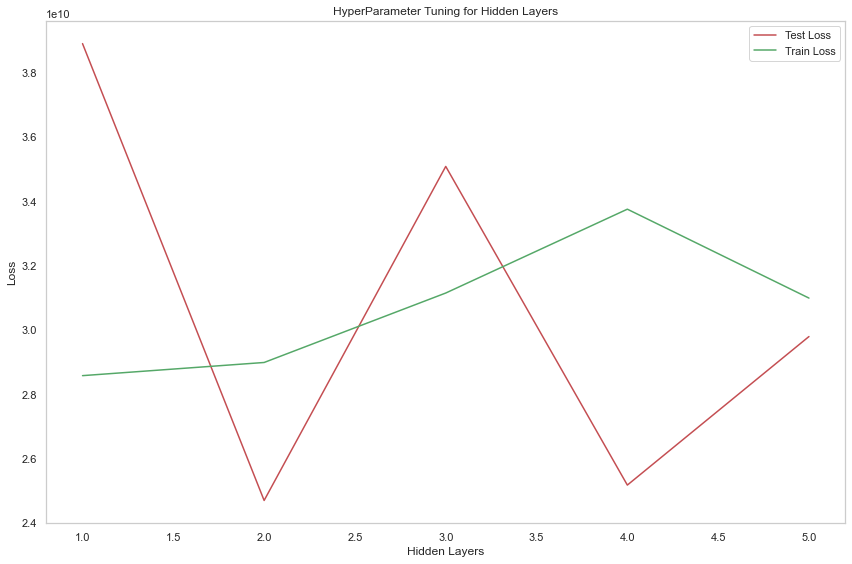

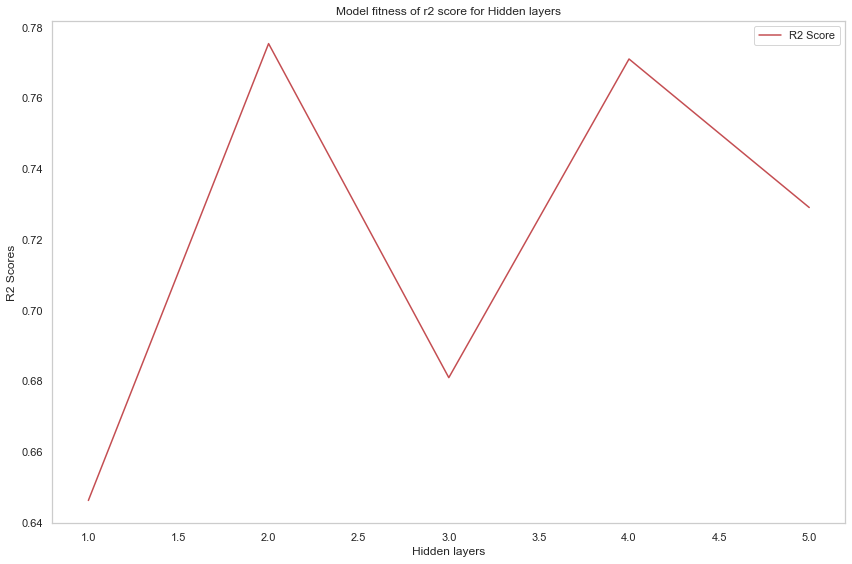

In [106]:
hiddenLayers = list(range(1,6,1))
test_loss=[]
train_loss=[]
r2 = []
for l in hiddenLayers:
  title = 'for Number Hidden Layers: {}'.format(l)
  print(title)
  model,loss = keras_model(layers=l,neurons=16,hid_activation='relu',dense_activation='relu',optimizer='adam',loss='mean_squared_error',size=25,epoch=100,lr = 0.1,title = title)
  bLoss = min(loss['loss'])
  train_loss.append(bLoss)
  test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
  r2.append(plotModelFitness(model,title))
plotloss(hiddenLayers,test_loss,train_loss,'Hidden Layers')
plotR2Score(hiddenLayers,r2,'Hidden layers')

## 6.7 Neurons vs Losses

for Number of Neurons: 8
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_74 (Dropout)        (None, 87)                0         
                                                                 
 dense_226 (Dense)           (None, 8)                 704       
                                                                 
 dense_227 (Dense)           (None, 8)                 72        
                                                                 
 batch_normalization_74 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_228 (Dense)           (None, 1)                 9         
                                                                 
Total params: 817
Trainable params: 801
Non-trainable params: 16
_____________________________

No handles with labels found to put in legend.


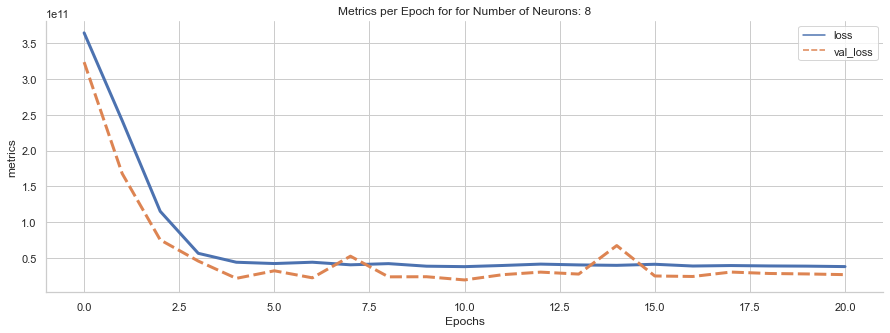

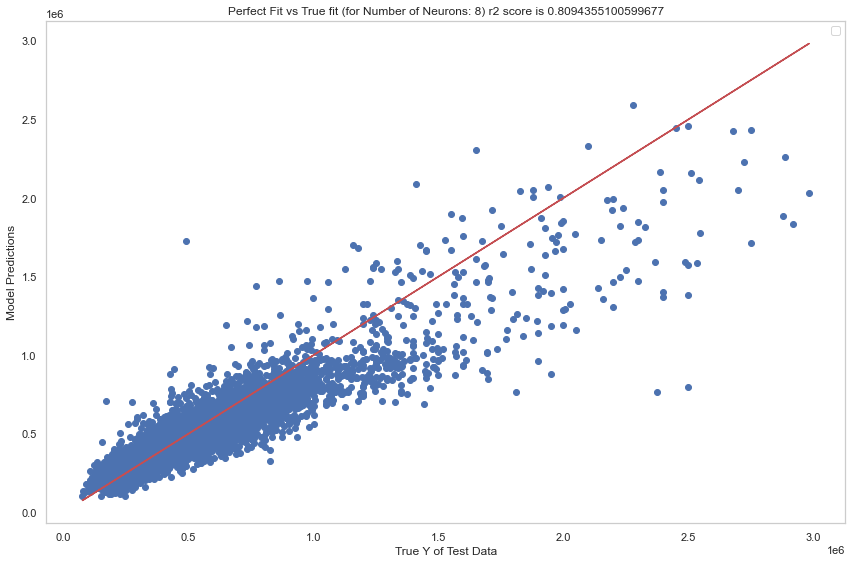

203/203 [==============================] - 0s 1ms/step - loss: 20950124544.0000 - mean_absolute_error: 88190.6484 - mean_squared_error: 20950124544.0000
for Number of Neurons: 16
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_75 (Dropout)        (None, 87)                0         
                                                                 
 dense_229 (Dense)           (None, 16)                1408      
                                                                 
 dense_230 (Dense)           (None, 16)                272       
                                                                 
 batch_normalization_75 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_231 (Dense)           (None, 1)                 17        
      

No handles with labels found to put in legend.


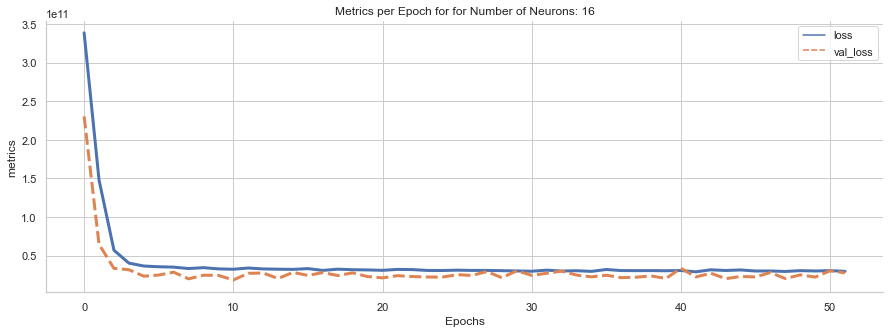

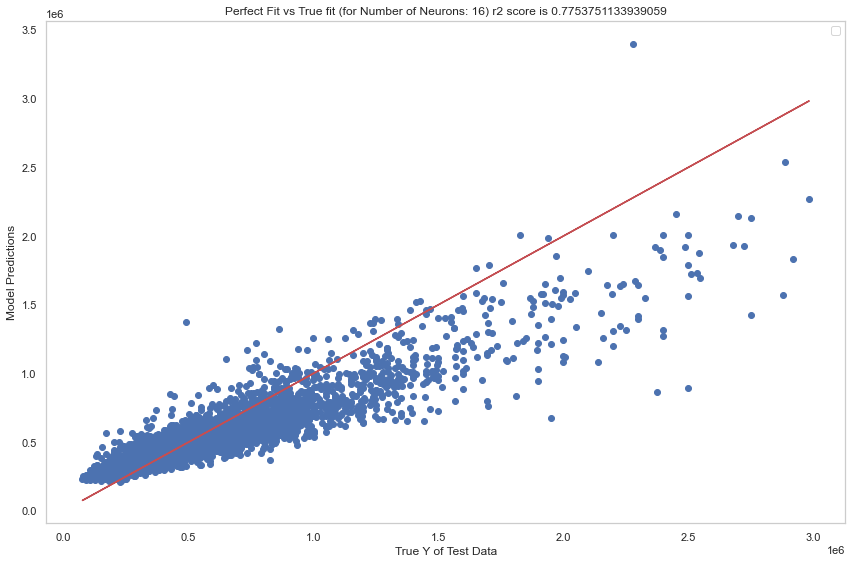

203/203 [==============================] - 0s 1ms/step - loss: 24694628352.0000 - mean_absolute_error: 100597.3438 - mean_squared_error: 24694628352.0000
for Number of Neurons: 32
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_76 (Dropout)        (None, 87)                0         
                                                                 
 dense_232 (Dense)           (None, 32)                2816      
                                                                 
 dense_233 (Dense)           (None, 32)                1056      
                                                                 
 batch_normalization_76 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_234 (Dense)           (None, 1)                 33        
     

No handles with labels found to put in legend.


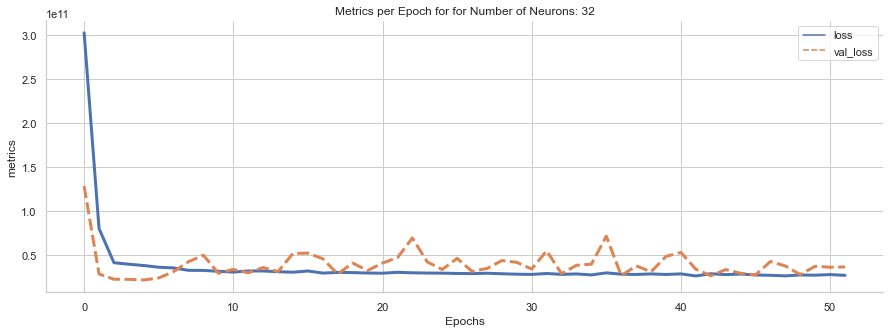

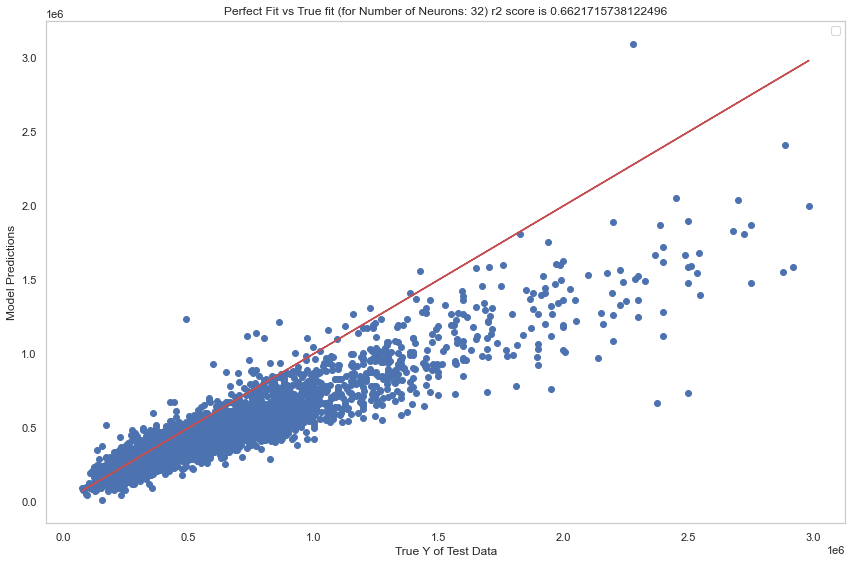

203/203 [==============================] - 0s 1ms/step - loss: 37139902464.0000 - mean_absolute_error: 132455.0156 - mean_squared_error: 37139902464.0000
for Number of Neurons: 64
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_77 (Dropout)        (None, 87)                0         
                                                                 
 dense_235 (Dense)           (None, 64)                5632      
                                                                 
 dense_236 (Dense)           (None, 64)                4160      
                                                                 
 batch_normalization_77 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_237 (Dense)           (None, 1)                 65        
     

No handles with labels found to put in legend.


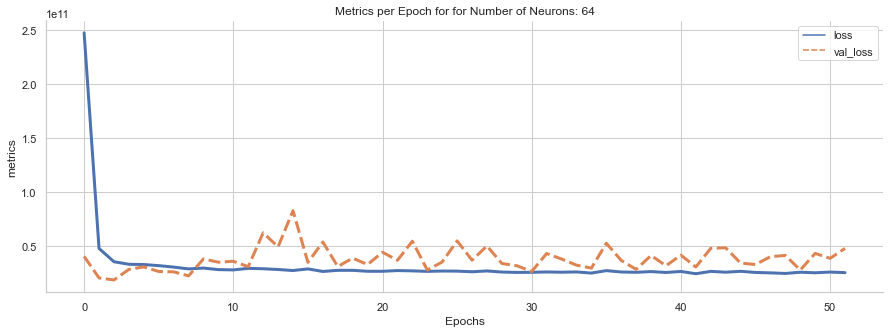

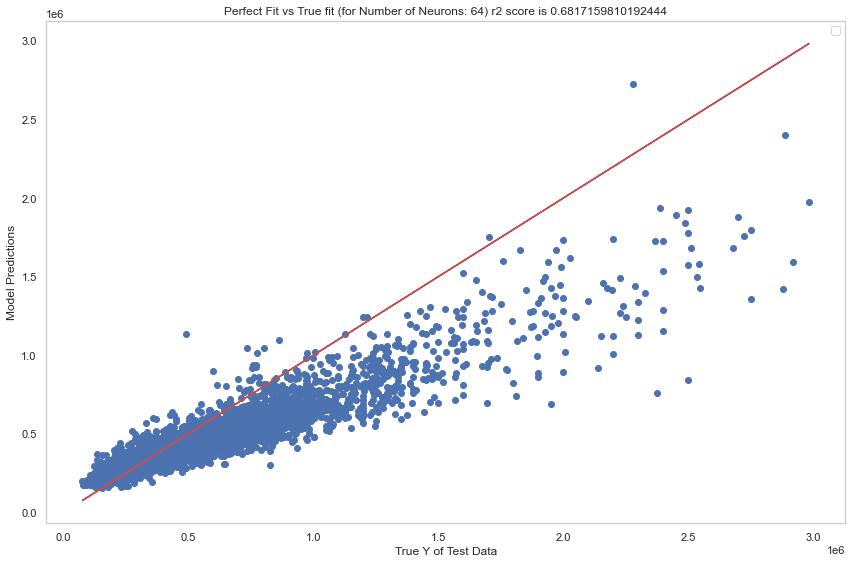

203/203 [==============================] - 0s 2ms/step - loss: 34991235072.0000 - mean_absolute_error: 116967.5625 - mean_squared_error: 34991235072.0000
for Number of Neurons: 128
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_78 (Dropout)        (None, 87)                0         
                                                                 
 dense_238 (Dense)           (None, 128)               11264     
                                                                 
 dense_239 (Dense)           (None, 128)               16512     
                                                                 
 batch_normalization_78 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_240 (Dense)           (None, 1)                 129       
    

No handles with labels found to put in legend.


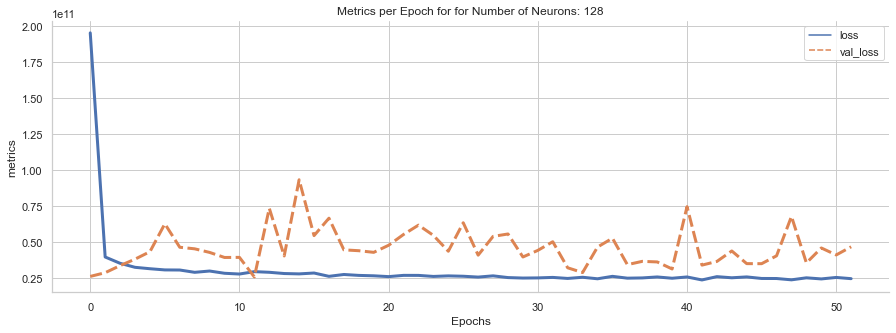

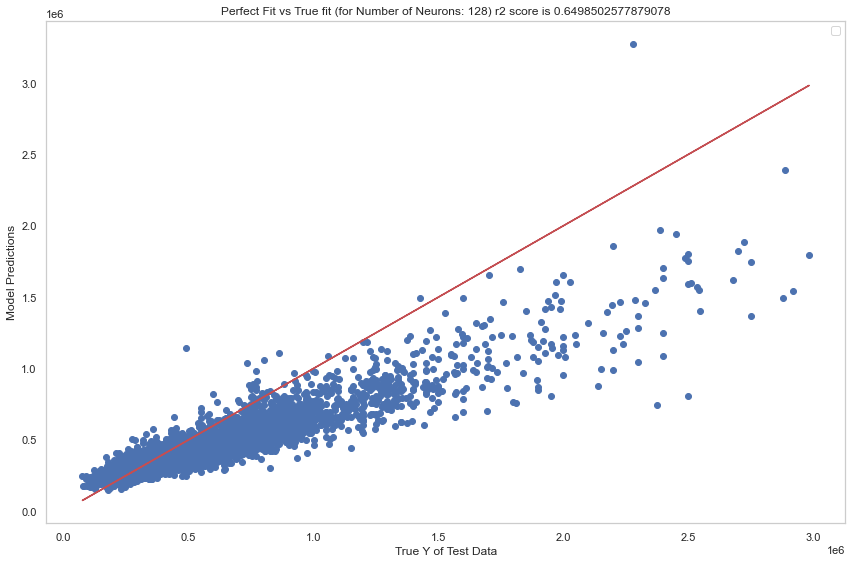

203/203 [==============================] - 0s 2ms/step - loss: 38494486528.0000 - mean_absolute_error: 125497.7578 - mean_squared_error: 38494486528.0000


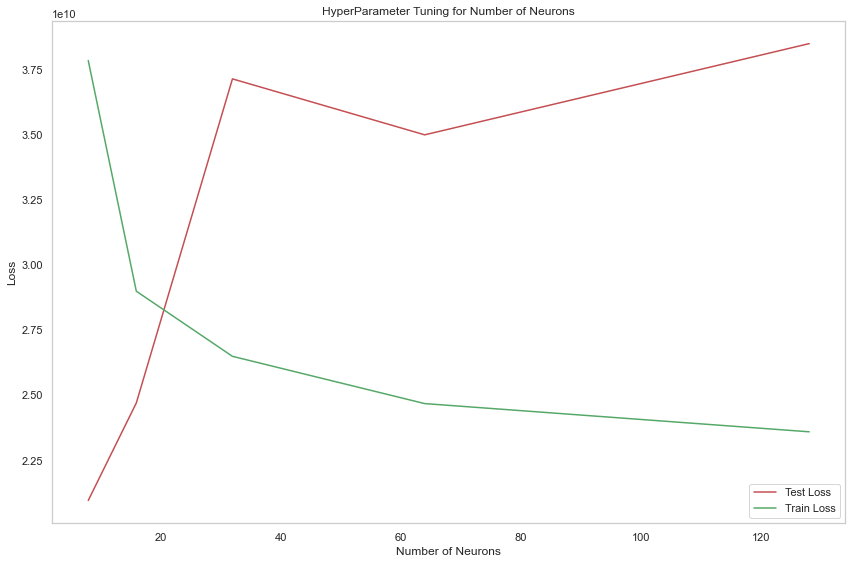

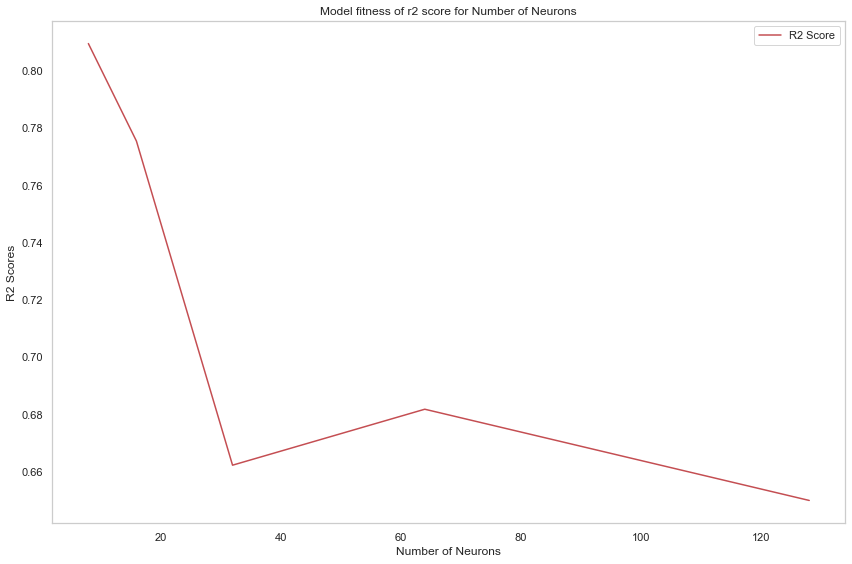

In [107]:
neurons = [8,16,32,64,128]
test_loss=[]
train_loss=[]
r2 = []
for n in neurons:
  title = 'for Number of Neurons: {}'.format(n)
  print(title)
  model,loss = keras_model(layers=2,neurons=n,hid_activation='relu',dense_activation='relu',optimizer='adam',loss='mean_squared_error',size=25,epoch=100,lr = 0.1,title = title)
  bLoss = min(loss['loss'])
  train_loss.append(bLoss)
  test_loss.append(model.evaluate(tf_X_test,tf_y_test)[0])
  r2.append(plotModelFitness(model,title))
plotloss(neurons,test_loss,train_loss,'Number of Neurons')
plotR2Score(neurons,r2,'Number of Neurons')

# 7. Model with all best parameters obtained from above

For the best parameter obtained from above, we used KFOLD cross validation 

In [135]:
from sklearn.model_selection import KFold
# Define the K-fold Cross Validator
kfold = KFold(n_splits=6, shuffle=True,random_state= 20)

# Define per-fold score container
loss_per_fold = []
r2_scores = []
# Merge inputs and targets
inputs = np.concatenate((tf_X_train, tf_X_test), axis=0)
targets = np.concatenate((tf_y_train, tf_y_test), axis=0)

inputs.shape, targets.shape

((21563, 87), (21563,))

## 7.1 

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_98 (Dropout)        (None, 87)                0         
                                                                 
 dense_298 (Dense)           (None, 8)                 704       
                                                                 
 dense_299 (Dense)           (None, 8)                 72        
                                                                 
 batch_normalization_98 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_300 (Dense)           (None, 1)                 9         
                                                                 
Total params: 817
Trainable params: 801
Non-trainable params: 16
_____________________________________________________

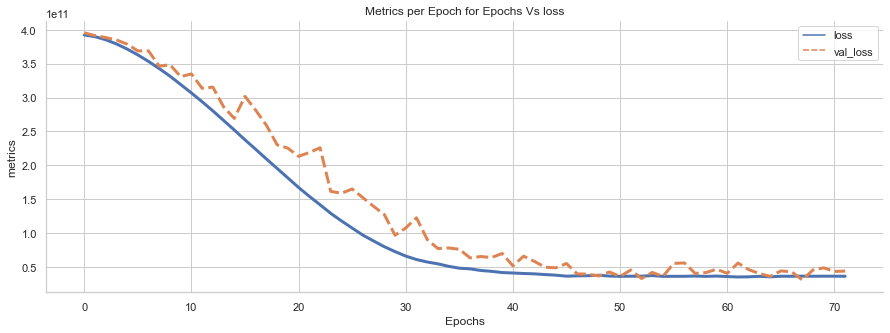

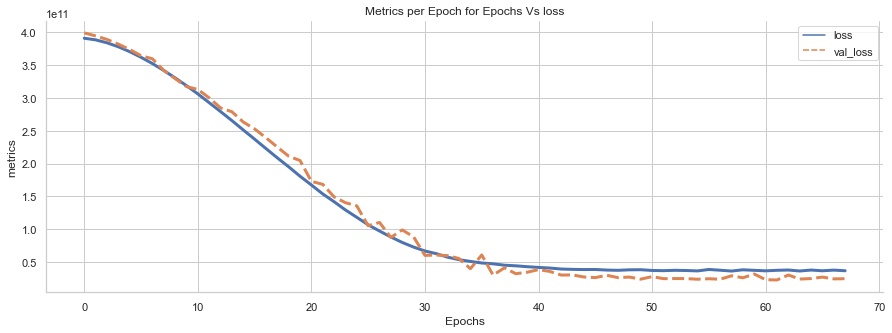

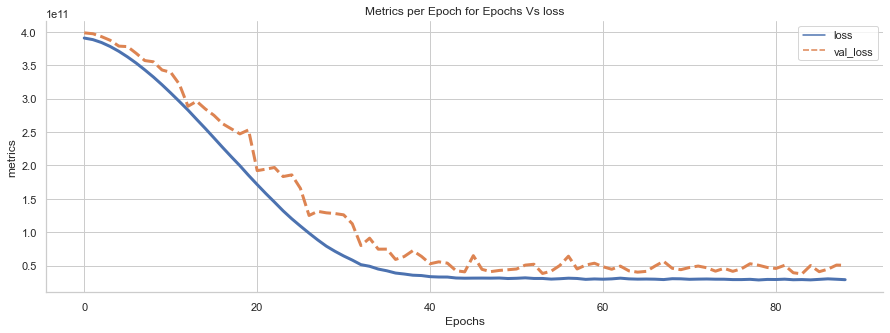

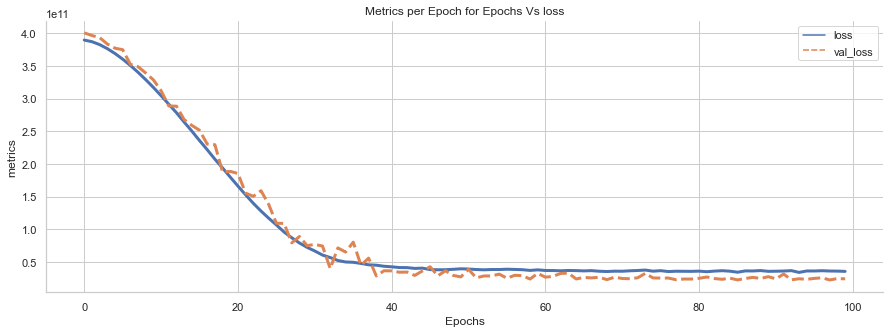

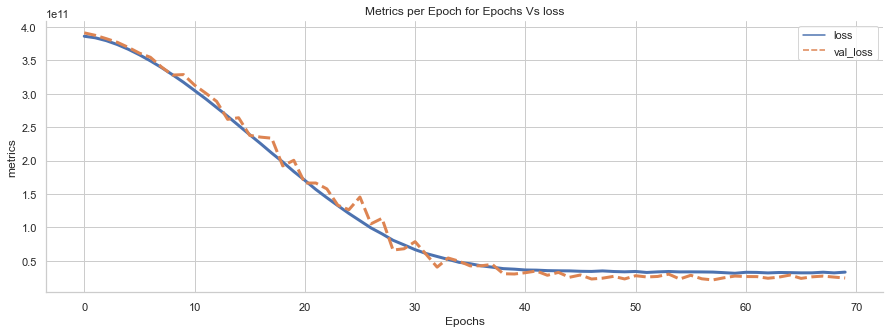

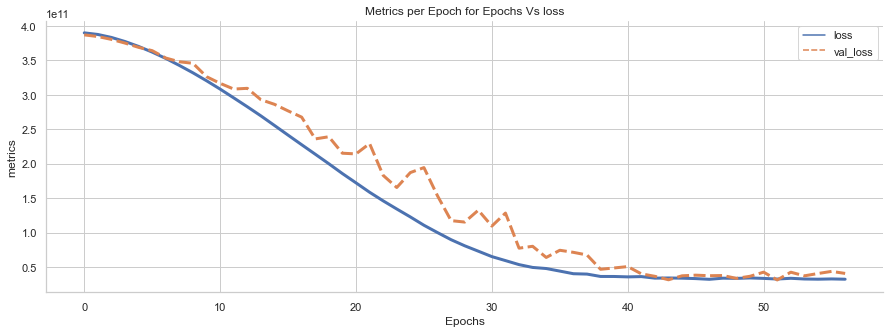

In [136]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):

  model,loss = keras_model(
    layers=2,
    neurons=8,
    hid_activation='relu',
    dense_activation='relu',
    optimizer='adam',loss='mean_squared_error',size=25,epoch=100,lr = 0.01,title='Epochs Vs loss', X_train= inputs[train], y_train= targets[train])
  
  predictions = model.predict(inputs[test])
  r = r2_score(targets[test],predictions)
  r2_scores.append(r*100)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; R2 Score of {r*100}%')
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(r2_scores)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - R2 Score: {r2_scores[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> R2 Score: {np.mean(r2_scores)} (+- {np.std(r2_scores)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

1. Parameters from best models trained above and its performance

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_111 (Dropout)       (None, 87)                0         
                                                                 
 dense_337 (Dense)           (None, 8)                 704       
                                                                 
 dense_338 (Dense)           (None, 8)                 72        
                                                                 
 batch_normalization_111 (Ba  (None, 8)                32        
 tchNormalization)                                               
                                                                 
 dense_339 (Dense)           (None, 1)                 9         
                                                                 
Total params: 817
Trainable params: 801
Non-trainable params: 16
_____________________________________________________

No handles with labels found to put in legend.


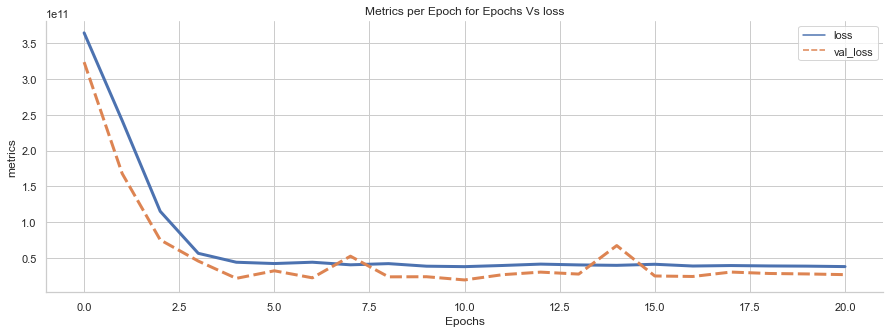

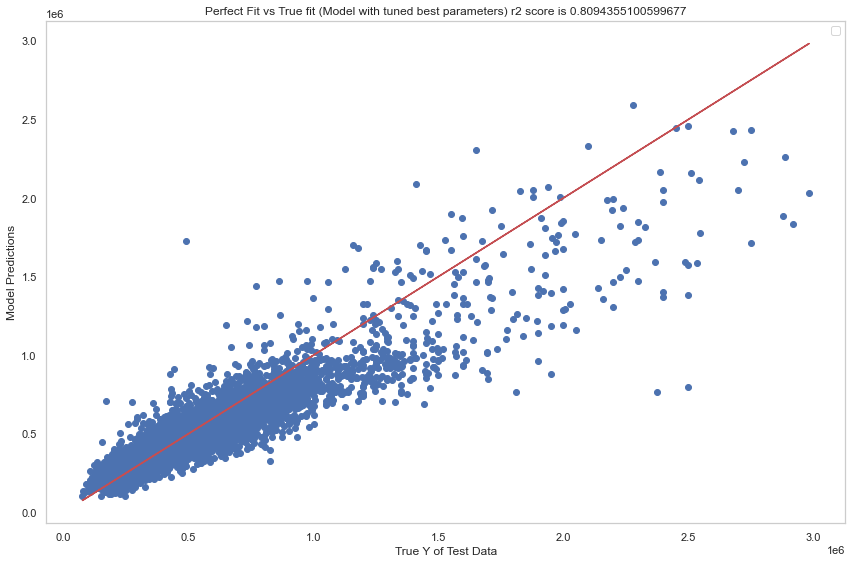

203/203 [==============================] - 0s 1ms/step - loss: 20950124544.0000 - mean_absolute_error: 88190.6484 - mean_squared_error: 20950124544.0000


0.8094355100599677

In [144]:
model,loss = keras_model(layers=2,neurons=8,hid_activation='relu',dense_activation='relu',optimizer='adam',loss='mean_squared_error',size=25,epoch=100,lr = 0.1,title='Epochs Vs loss')
plotModelFitness(model,"Model with tuned best parameters")